+ all 10m buffers and building types buffers are calculated with fhsz by counties
+ gee export,"\\wsl.localhost\Ubuntu\home\yl\wildfire\statistic\vegechange\fhszbuffer"
+ gee join house: wildfire/code/geeresultsjoinhouse.ipynb [droprepeative FID where each house belongs to multi clusters caused by geometry errors]
    + gee join house结果"\\wsl.localhost\Ubuntu\home\yl\wildfire\statistic\vegechange\buffer10m"
    + different counties merge stastistical results,/home/yl/wildfire/code/vegebuffer10_v1-3.ipynb


In [2]:
from sklearn.cluster import DBSCAN
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import MultiPolygon, Polygon
from shapely.ops import unary_union
from shapely.geometry import MultiPoint
from pyproj import CRS
from sklearn.cluster import DBSCAN
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import MultiPolygon, Polygon
from shapely.ops import unary_union
from shapely.geometry import MultiPoint
from pyproj import CRS
import os
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from matplotlib.ticker import MaxNLocator
import contextily as cx
import geopandas as gpd
from scipy.stats import gaussian_kde
from scipy import stats
import gc
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
import seaborn as sns
import matplotlib.colors as colors
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors
from matplotlib.lines import Line2D
from matplotlib.colors import to_rgba
from matplotlib import ticker

from matplotlib.patches import Patch
from matplotlib.colors import ListedColormap

## font

In [3]:
pd.options.mode.chained_assignment = None  # Suppress the warning
import matplotlib.font_manager as fm
font_path = os.path.expanduser('~/.fonts/arial.ttf')
fm.fontManager.addfont(font_path)
plt.rcParams['font.family'] = 'Arial'
fonts = [f.name for f in matplotlib.font_manager.fontManager.ttflist]
print(sorted(set(fonts)))
fonts = [f.name for f in fm.fontManager.ttflist]
arial_fonts = [f for f in fonts if 'Arial' in f]
print("Available Arial fonts:", arial_fonts)
plt.rcParams['font.family'] = 'Arial'
# 设置pandas显示的最大列数
pd.set_option('display.max_columns', None)
# 设置某一行的最大字符显示长度，防止某列字符过长时被截断，可以根据需要调整数字
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.precision', 5)  # 设置小数点显示精度
# 设置全局显示选项，保留2位小数
pd.options.display.float_format = "{:.6f}".format

['Arial', 'DejaVu Sans', 'DejaVu Sans Display', 'DejaVu Sans Mono', 'DejaVu Serif', 'DejaVu Serif Display', 'Inconsolata', 'STIXGeneral', 'STIXNonUnicode', 'STIXSizeFiveSym', 'STIXSizeFourSym', 'STIXSizeOneSym', 'STIXSizeThreeSym', 'STIXSizeTwoSym', 'Source Code Pro', 'Ubuntu', 'Ubuntu Condensed', 'Ubuntu Mono', 'cmb10', 'cmex10', 'cmmi10', 'cmr10', 'cmss10', 'cmsy10', 'cmtt10']
Available Arial fonts: ['Arial']


In [ ]:
housefhsz=gpd.read_file('../statistic/vegechange/onlyfhszvegechange.gpkg')
newhouse=housefhsz.query('newhouse==1')
newhouse['COUNTYFP'].isna().sum()
# print(len(housefhsz.query('newhouse==0')),len(housefhsz.query('newhouse==1')))

In [372]:


def clusterandbufferhouse(meter1,fp,year):
    if year==2022:
        housef=housefhsz[housefhsz['COUNTYFP'] == fp]
    print(len(housef))
    expected_crs = CRS("EPSG:5070")
    if housef.crs==expected_crs:
        # Create 10mbuffer around houses and dissolve overlapping buffers into single geometries.
        buffer_minus_houses = housef.geometry.buffer(meter1).unary_union
        # Handle MultiPolygon and Polygon cases
        if isinstance(buffer_minus_houses, Polygon):
            remaining_buffer_polygons = [buffer_minus_houses]
        elif isinstance(buffer_minus_houses, MultiPolygon):
            remaining_buffer_polygons = list(buffer_minus_houses.geoms)
        else:
            remaining_buffer_polygons = []
 
        remaining_buffer_gdf = gpd.GeoDataFrame(geometry=remaining_buffer_polygons, crs="EPSG:5070")
        remaining_buffer_gdf = remaining_buffer_gdf.to_crs("EPSG:4326")
        remaining_buffer_gdf.reset_index(inplace=True)
        remaining_buffer_gdf.rename(columns={'index': 'cluster'}, inplace=True)
        remaining_buffer_gdf['COUNTYFP']=fp
        remaining_buffer_gdf[f'cluster{meter1}82']= remaining_buffer_gdf['COUNTYFP']+  remaining_buffer_gdf['cluster'].astype(str)+'000'
        folder='../data/Building/cluster/{year}/10m/fhsz'
        # remaining_buffer_gdf.to_file(f'../data/Building/cluster/housingtype/{year}buffer{meter1}mdiffhouse{fp}fhsz.gpkg')
        # print(f'finish{fp}')
        return remaining_buffer_gdf

In [ ]:
def cluster15and50(meter1,meter2):
   
    
    s111=clusterandbufferhouse(meter1,'111',2022)
    s083=clusterandbufferhouse(meter1,'083',2022)
    s037=clusterandbufferhouse(meter1,'037',2022)
    s059=clusterandbufferhouse(meter1,'059',2022)

    s073=clusterandbufferhouse(meter1,'073',2022)
    s071=clusterandbufferhouse(meter1,'071',2022)
    s065=clusterandbufferhouse(meter1,'065',2022)
    s079=clusterandbufferhouse(meter1,'079',2022)
    s029=clusterandbufferhouse(meter1,'029',2022)
    sbuffermeter1=pd.concat([s079,s029,s083,s111,s037,s059,s073,s065,s071],axis=0)
    print('wwwww')
    s111=clusterandbufferhouse(meter2,'111',2022)
    s083=clusterandbufferhouse(meter2,'083',2022)
    s037=clusterandbufferhouse(meter2,'037',2022)
    s059=clusterandbufferhouse(meter2,'059',2022)
    s073=clusterandbufferhouse(meter2,'073',2022)
    s071=clusterandbufferhouse(meter2,'071',2022)
    s065=clusterandbufferhouse(meter2,'065',2022)
    s079=clusterandbufferhouse(meter2,'079',2022)
    s029=clusterandbufferhouse(meter2,'029',2022)
    sbuffermeter2=pd.concat([s079,s029,s083,s111,s037,s059,s073,s065,s071],axis=0)
    if housefhsz.crs!=sbuffermeter1.crs:
        housefhsz=housefhsz.to_crs(sbuffermeter1.crs)
    sbuffer30joinhouse=gpd.sjoin(housefhsz,sbuffermeter1,how='left')
    sbuffer50joinhouse=gpd.sjoin(housefhsz,sbuffermeter2,how='left')
    return sbuffer30joinhouse,sbuffer50joinhouse
housefhsz=housefhsz.to_crs('epsg:5070')
sbuffer15joinhouse,sbuffer50joinhouse=cluster15and50(15,50)
    

In [49]:
def readgpd(f):
    vege=gpd.read_file(f)
    return vege
meter1=15
s079=readgpd(f'../data/Building/cluster/housingtype/2022buffer{meter1}mdiffhouse079fhsz.gpkg')
s029=readgpd(f'../data/Building/cluster/housingtype/2022buffer{meter1}mdiffhouse029fhsz.gpkg')
s083=readgpd(f'../data/Building/cluster/housingtype/2022buffer{meter1}mdiffhouse083fhsz.gpkg')
s111=readgpd(f'../data/Building/cluster/housingtype/2022buffer{meter1}mdiffhouse111fhsz.gpkg')
s037=readgpd(f'../data/Building/cluster/housingtype/2022buffer{meter1}mdiffhouse037fhsz.gpkg')
s059=readgpd(f'../data/Building/cluster/housingtype/2022buffer{meter1}mdiffhouse059fhsz.gpkg')
s073=readgpd(f'../data/Building/cluster/housingtype/2022buffer{meter1}mdiffhouse073fhsz.gpkg')
s065=readgpd(f'../data/Building/cluster/housingtype/2022buffer{meter1}mdiffhouse065fhsz.gpkg')
s071=readgpd(f'../data/Building/cluster/housingtype/2022buffer{meter1}mdiffhouse071fhsz.gpkg')
sbuffermeter15=pd.concat([s079,s029,s083,s111,s037,s059,s073,s065,s071],axis=0)
 
meter1=50
s079=readgpd(f'../data/Building/cluster/housingtype/2022buffer{meter1}mdiffhouse079fhsz.gpkg')
s029=readgpd(f'../data/Building/cluster/housingtype/2022buffer{meter1}mdiffhouse029fhsz.gpkg')
s083=readgpd(f'../data/Building/cluster/housingtype/2022buffer{meter1}mdiffhouse083fhsz.gpkg')
s111=readgpd(f'../data/Building/cluster/housingtype/2022buffer{meter1}mdiffhouse111fhsz.gpkg')
s037=readgpd(f'../data/Building/cluster/housingtype/2022buffer{meter1}mdiffhouse037fhsz.gpkg')
s059=readgpd(f'../data/Building/cluster/housingtype/2022buffer{meter1}mdiffhouse059fhsz.gpkg')
s073=readgpd(f'../data/Building/cluster/housingtype/2022buffer{meter1}mdiffhouse073fhsz.gpkg')
s065=readgpd(f'../data/Building/cluster/housingtype/2022buffer{meter1}mdiffhouse065fhsz.gpkg')
s071=readgpd(f'../data/Building/cluster/housingtype/2022buffer{meter1}mdiffhouse071fhsz.gpkg')

sbuffermeter50=pd.concat([s079,s029,s083,s111,s037,s059,s073,s065,s071],axis=0)

In [51]:
housefhsz=housefhsz.to_crs('epsg:4326')

In [ ]:
housefhsz['COUNTYFP'].isna().sum()

In [56]:
sbuffer15joinhouse=gpd.sjoin(housefhsz,sbuffermeter15,how='left')
sbuffer50joinhouse=gpd.sjoin(housefhsz,sbuffermeter50,how='left')
print(sbuffer15joinhouse.columns)
print(len(sbuffer15joinhouse))

In [ ]:
### exclude the building where the cluster county doesn't equal the county of buildings centorid. COUNTYFP_left: decided by the centorid of buildings
sbuffer15joinhouse1=sbuffer15joinhouse.query('COUNTYFP_left==COUNTYFP_right')
sbuffer50joinhouse1=sbuffer50joinhouse.query('COUNTYFP_left==COUNTYFP_right')
len(sbuffer50joinhouse1.query('newhouse==1'))

In [ ]:
## 计算每一个类中的房子数目，并将该房子数目指定给类中的每一个建筑
def addhousecount(df1,df2):
    df=df1.merge(df2[['FID_Califo','cluster5082']],on='FID_Califo',how='left')
    df=df.assign(allhousecountbybuffer508=df.groupby('cluster5082')['FID_Califo'].transform(lambda x: x.nunique()),
                allhousecountbybuffer158=df.groupby('cluster1582')['FID_Califo'].transform(lambda x: x.nunique()))                                                                                                   
    # print(len(df.drop_duplicates(subset=['cluster5082']).query('allhousecountbybuffer5082==1')))
    # print(df.query('allhousecountbybuffer508>1').drop_duplicates(subset=['cluster5082'])['allhousecountbybuffer508'].describe())
    # print(df.query('allhousecountbybuffer3082>1').drop_duplicates(subset=['cluster1582'])['allhousecountbybuffer3082'].describe())
    print(len(df))
    return df
sbufferjoinhousefhsz=addhousecount(sbuffer15joinhouse1,sbuffer50joinhouse1)

In [ ]:
def adddensitybybuffer3050(df):
    # meandensitybycluster= df.query('allhousecountbybuffer3050>3').drop_duplicates(subset=['cluster3050'])\
    # ['allhousecountbybuffer50'].mean()
    # print(meandensitybycluster)
    df['housingdensityclass155082'] = df['allhousecountbybuffer508'].apply(
        lambda x: 'clustered' if x >50 else 'scattered')
    df.loc[df['allhousecountbybuffer508'] <=3, 'housingdensityclass155082'] = 'isloated'
    
    df.loc[(df['allhousecountbybuffer158'] <= 10) & (df['housingdensityclass155082'].isin(['clustered'])), 'housingdensityclass155082'] = 'dense'
    
    df.loc[(df['allhousecountbybuffer158'] > 10) & (df['housingdensityclass155082'].isin(['clustered'])), 'housingdensityclass155082'] = 'very dense'
    print(len(df.drop_duplicates('FID_Califo').query('newhouse==1')))
    
    print(df.drop_duplicates('FID_Califo').query('newhouse==0').groupby('newhouse')['housingdensityclass155082'].value_counts())
    return df
sbufferjoinhousefhsz=adddensitybybuffer3050(sbufferjoinhousefhsz)

## define building types

In [ ]:
sbufferjoinhousefhsz['housingdensityclass155082'].value_counts()

In [ ]:
def clusterandbufferhouse(housefhsz,meter1,housetype,year):
    if year==2022:
        # housefliter=house[house['GEOID']=='060590218231']   
        housef=housefhsz[housefhsz['housingdensityclass155082'] == housetype]
    print(len(housef))
    
    expected_crs = CRS("EPSG:5070")
    housef=housef.to_crs('epsg:5070')
    if housef.crs==expected_crs:
        # Create 10mbuffer around houses and dissolve overlapping buffers into single geometries.
        buffer_minus_houses = housef.geometry.buffer(meter1).unary_union
        # buffer_minus_houses = dissolved10.difference(housef.geometry.unary_union)
        # Handle MultiPolygon and Polygon cases
        if isinstance(buffer_minus_houses, Polygon):
            remaining_buffer_polygons = [buffer_minus_houses]
        elif isinstance(buffer_minus_houses, MultiPolygon):
            remaining_buffer_polygons = list(buffer_minus_houses.geoms)
        else:
            remaining_buffer_polygons = []

        # Create GeoDataFrame for remaining buffer after subtracting houses
        remaining_buffer_gdf = gpd.GeoDataFrame(geometry=remaining_buffer_polygons, crs="EPSG:5070")
        # Output: GeoDataFrame with buffer polygons after subtracting overlapping houses.
        # print(remaining_buffer_gdf.head(2))
        remaining_buffer_gdf = remaining_buffer_gdf.to_crs("EPSG:4326")
        remaining_buffer_gdf.reset_index(inplace=True)
        remaining_buffer_gdf.rename(columns={'index': 'cluster'}, inplace=True)
        # remaining_buffer_gdf['COUNTYFP']=fp
        # remaining_buffer_gdf[f'cluster{meter1}82']= remaining_buffer_gdf['COUNTYFP']+  remaining_buffer_gdf['cluster'].astype(str)+'000'
        folder='../data/Building/cluster/{year}/10m/fhsz'
        remaining_buffer_gdf.to_file(f'../data/Building/cluster/housingtype/vis/{year}buffer{meter1}mdiffhouse{housetype}fhsz.gpkg')
        # print(f'finish{fp}')
        return remaining_buffer_gdf

clusterandbufferhouse(sbufferjoinhousefhsz,50,housetype='very dense',year=2022)
clusterandbufferhouse(sbufferjoinhousefhsz,50,housetype='dense',year=2022)
clusterandbufferhouse(sbufferjoinhousefhsz,50,housetype='scattered',year=2022)
clusterandbufferhouse(sbufferjoinhousefhsz,50,housetype='isloated',year=2022)

## old house near new

In [176]:
sbufferjoinhousefhsz.query('newhouse==0 and newhcount==0 and treeratiochange>0.1').groupby(['COUNTYFP','housingdensityclass155082']).size()
len(sbufferjoinhousefhsz.query('newhouse==0 and newhcount==0 and treeratiochange>0.1'))
sbufferjoinhousefhsz['oldhcount']=sbufferjoinhousefhsz['allhcount']-sbufferjoinhousefhsz['newhcount']
# oldwithnewhouse=sbufferjoinhousefhsz.query('newhouse==0 and newhcount>0')
# oldwithnewhouse['newoldratio']=oldwithnewhouse['newhcount']/oldwithnewhouse['oldhcount']

sbufferjoinhousefhsz.query('newhouse==0 and newhcount==0 and treeratiochange>0.1')\
.drop(columns=['geometry']).set_geometry('centroid')[['housingdensityclass155082','centroid','treeratiochange','newhcount','allhcount','oldhcount']]\
.to_file('../data/Building/cluster/housingtype/vis/oldwitnewouttreerise01.gpkg')

In [ ]:
gpd.read_file('../data/Building/cluster/housingtype/vis/oldwithnewtreerise01.gpkg').columns

## Merge with original 0.74mi,add some properties

In [ ]:
housefhszedge=gpd.read_file('../statistic/vegechange/househighstasticend.gpkg')
housefhszedge.columns
sbufferjoinhousefhsz=sbufferjoinhousefhsz.merge(housefhszedge[['FID_Califo','Tract','GEOID','COUNTY','WUIFLAG202','urbanrural','FHSZ_7Clas']],on='FID_Califo',how='left')

In [ ]:
def caltreeratiochange(df):
    
    df=df.assign(allhcount=df.groupby('cluster2022')['FID_Califo'].transform(lambda x: x.nunique()),
                newhcount=df.groupby('cluster2022')['newhouse'].transform(lambda x: (x ==1).sum()))
    df['Tract']=df['GEOID'].str[0:-1]
    df=df.rename(columns={
        
        'COUNTYFP_left':'COUNTYFP'
    }).drop(columns=['COUNTYFP_right','index_right'],errors='ignore')
   
    df['treeratio2010']=df['areatree2010']/df['areaall2010']
    df['grassratio2010']=df['areagrass2010']/df['areaall2010']

    df['treeratio2022']=df['areatree2022']/df['areaall2022']
    df['grassratio2022']=df['areagrass2022']/df['areaall2022']
    df['treeratiochange']=df['treeratio2022']-df['treeratio2010']
    df['grassratiochange']=df['grassratio2022']-df['grassratio2010']
    df['areatreegrass2010']=df['areatree2010']+df['areagrass2010']
    df['areatreegrass2022']=df['areatree2022']+df['areagrass2022']
    df['treegrassratio2010']=df['areatreegrass2010']/df['areaall2010']
    df['treegrassratio2022']=df['areatreegrass2022']/df['areaall2022']
    df['treegrassratiochange']=df['treegrassratio2022']-df['treegrassratio2010'] 
    print(df['COUNTYFP'].value_counts())
    df=df.dropna(subset=['treeratio2022'])
    print(len(df))
    print(df['COUNTYFP'].value_counts())
    df=df[~(df['treeratio2010'].isna() & (df['newhouse'] != 1))]
    # df['cluster2022'] = df['cluster2022'].apply(lambda x: x[1:] if x.startswith('0111') else x)
    # df['cluster2010'] = df['cluster2010'].apply(lambda x: x[1:] if x.startswith('0111') else x)
    print(len(df))

    return df
sbufferjoinhousefhsz=caltreeratiochange(sbufferjoinhousefhsz)


In [ ]:
sbufferjoinhousefhsz.drop(columns=['areabare2022','areagrass2022','areaurban2022','areabare2010','areagrass2010','areaurban2010','grassratiochange','treegrassratiochange','areatreegrass2010',
       'areatreegrass2022', 'treegrassratio2010', 'treegrassratio2022']).to_file('../statistic/vegechange/vege_housetype/fhszvegechangeanddensityclassgee.shp')

In [ ]:
sbufferjoinhousefhsz['cluster2022'].nunique(),sbufferjoinhousefhsz['cluster2010'].nunique()
sbufferjoinhousefhsz['housingdensityclass155082'].value_counts()

## Read data

In [118]:
8.983152841195210763*111000

997129.9653726683

In [117]:
sbufferjoinhousefhsz.to_file('../statistic/vegechange/vege_housetype/fhszvegechangeanddensityclassrevise1.gpkg')

In [4]:
# sbufferjoinhousefhsz=gpd.read_file('../statistic/vegechange/vege_housetype/fhszvegechangeanddensityclass.gpkg') before 2025/2/23
sbufferjoinhousefhsz=gpd.read_file('../statistic/vegechange/vege_housetype/fhszvegechangeanddensityclassrevise1.gpkg')

In [119]:
sbufferjoinhousefhsz['housingdensityclass155082'].value_counts()

housingdensityclass155082
very dense    481619
dense         156448
scattered      78854
isloated       27460
Name: count, dtype: int64

In [4]:
481619/len(sbufferjoinhousefhsz),sbufferjoinhousefhsz.columns

(0.6470060358875361,
 Index(['FID_Califo', 'COUNTYFP', 'areaall2010', 'areabare2010',
        'areagrass2010', 'areatree2010', 'areaurban2010', 'cluster2010',
        'newhouse', 'areaall2022', 'areabare2022', 'areagrass2022',
        'areatree2022', 'areaurban2022', 'cluster2022', 'cluster',
        'cluster1582', 'cluster5082', 'allhousecountbybuffer508',
        'allhousecountbybuffer158', 'housingdensityclass155082', 'Tract',
        'GEOID', 'COUNTY', 'WUIFLAG202', 'urbanrural', 'FHSZ_7Clas',
        'treeratio2010', 'grassratio2010', 'treeratio2022', 'grassratio2022',
        'treeratiochange', 'grassratiochange', 'areatreegrass2010',
        'areatreegrass2022', 'treegrassratio2010', 'treegrassratio2022',
        'treegrassratiochange', 'allhcount', 'newhcount',
        'verydensehousecountbytract', 'densehousecountbytract',
        'scatteredhousecountbytract', 'isolatedhousecountbytract',
        'houseclassbytract', 'treerisecountbytract', 'oldcountbytract',
        'treerise

In [176]:
sbufferjoinhousefhsz.query('newhouse==1').to_file('../statistic/vegechange/newhouseall.gpkg')

## Tree cover change related to national forest boundary

In [6]:
sbufferjoinhousefhsz['geometry'].head(2)

0    POLYGON ((-119.96867 35.28322, -119.96878 35.28322, -119.96878 35.28334, -119.96867 35.28334, -119.96867 35.28322))
1      POLYGON ((-119.99959 35.29987, -119.99959 35.29978, -119.9997 35.29978, -119.9997 35.29987, -119.99959 35.29987))
Name: geometry, dtype: geometry

In [13]:
len(gpd.read_file('../boundary/nf.gpkg')),gpd.read_file('../boundary/nf.gpkg').crs

(5,
 <Geographic 2D CRS: EPSG:4326>
 Name: WGS 84
 Axis Info [ellipsoidal]:
 - Lat[north]: Geodetic latitude (degree)
 - Lon[east]: Geodetic longitude (degree)
 Area of Use:
 - name: World.
 - bounds: (-180.0, -90.0, 180.0, 90.0)
 Datum: World Geodetic System 1984 ensemble
 - Ellipsoid: WGS 84
 - Prime Meridian: Greenwich)

In [15]:
nf=gpd.read_file('../boundary/nf.gpkg').to_crs('epsg:5070')

In [ ]:
def groupbuildingbydistancetonf(gdfhouse,nf):
    gdfhouse=gdfhouse.to_crs(nf.crs)
    nf['buffer0km']=1
    gdfhouse=gpd.sjoin(gdfhouse,nf,how='left')
    
    buffer1km=nf.buffer(10)
    buffer1km_gdf = gpd.GeoDataFrame(geometry=buffer1km, crs=nf.crs)
    buffer1km_gdf['buffer1km']=1
    print(buffer1km_gdf.head(1))
    
    gdfhouse=gpd.sjoin(gdfhouse,buffer1km_gdf,how='left')
    print(gdfhouse.columns)

    

groupbuildingbydistancetonf(sbufferjoinhousefhsz,nf)

    
    

In [31]:
def groupbuildingbydistancetonf(gdfhouse, nf):
    # Ensure CRS matches
    gdfhouse = gdfhouse.to_crs(epsg=5070)  
    nf = nf.to_crs(epsg=5070)
    
    # Define buffer distances in meters (0 to 10km)
    buffer_distances = [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]
    distance_labels = ['Inside NF'] + [f'{i}-{i+1}km' for i in range(0, 10)]
    
    # Temporary column to track buffer assignment
    gdfhouse['distance_group'] = None
    
    # Iterate through buffers from smallest to largest
    for i, dist in enumerate(buffer_distances):
        if i == 0:
            # Buildings inside NF (0km buffer)
            buffer_gdf = nf.copy()
            buffer_gdf['buffer_key'] = 1
        else:
            # Create buffer for current distance
            buffer = nf.buffer(dist)
            buffer_gdf = gpd.GeoDataFrame(geometry=buffer, crs=nf.crs)
            buffer_gdf['buffer_key'] = 1
        
        # Spatial join with buildings not yet assigned
        temp_join = gpd.sjoin(
            gdfhouse[gdfhouse['distance_group'].isna()],
            buffer_gdf[['geometry', 'buffer_key']],
            how='left',
            predicate='within'
        )
        
        # Assign distance group only to buildings that haven't been assigned yet
        mask = temp_join['buffer_key'] == 1
        gdfhouse.loc[temp_join[mask].index, 'distance_group'] = distance_labels[i]
    
    # Buildings beyond 10km
    gdfhouse['distance_group'] = gdfhouse['distance_group'].fillna('>10km')
    
    return gdfhouse

# Apply the function
sbufferjoinhousefhsz = groupbuildingbydistancetonf(sbufferjoinhousefhsz, nf)

In [30]:
len(nf)

5

In [28]:
del housegdf_with_distances

In [24]:
len(housegdf_with_distances.query('distance_group=="Inside NF"'))

63690

In [116]:
sbufferjoinhousefhsz.groupby(['distance_group','housingdensityclass155082']).size().reset_index()

distance_group housingdensityclass155082       0
0           0-1km                     dense   11271
1           0-1km                  isloated    2000
2           0-1km                 scattered    5278
3           0-1km                very dense   36080
4           1-2km                     dense   12424
5           1-2km                  isloated    1740
6           1-2km                 scattered    4657
7           1-2km                very dense   38157
8           2-3km                     dense    9496
9           2-3km                  isloated    1568
10          2-3km                 scattered    4423
11          2-3km                very dense   23235
12          3-4km                     dense    6815
13          3-4km                  isloated    1412
14          3-4km                 scattered    3859
15          3-4km                very dense   15771
16          4-5km                     dense    5952
17          4-5km                  isloated    1286
18          4-5km                 scattered    3149
19          4-5km                very dense   16084
20          5-6km                     dense    4477
21          5-6km                  isloated    1219
22          5-6km                 scattered    3356
23          5-6km                very dense   12271
24          6-7km                     dense    5480
25          6-7km                  isloated    1335
26          6-7km                 scattered    3863
27          6-7km                very dense   14643
28          7-8km                     dense    6366
29          7-8km                  isloated    1351
30          7-8km                 scattered    4041
31          7-8km                very dense   15697
32          8-9km                     dense    6950
33          8-9km                  isloated    1315
34          8-9km                 scattered    4057
35          8-9km                very dense   10637
36         9-10km                     dense    7151
37         9-10km                  isloated    1330
38         9-10km                 scattered    3851
39         9-10km                very dense   11812
40          >10km                     dense   65665
41          >10km                  isloated   10699
42          >10km                 scattered   32358
43          >10km                very dense  246110
44      Inside NF                     dense   14401
45      Inside NF                  isloated    2205
46      Inside NF                 scattered    5962
47      Inside NF                very dense   41122

In [36]:
sbufferjoinhousefhsz.columns

Index(['FID_Califo', 'COUNTYFP', 'areaall2010', 'areabare2010',
       'areagrass2010', 'areatree2010', 'areaurban2010', 'cluster2010',
       'newhouse', 'areaall2022', 'areabare2022', 'areagrass2022',
       'areatree2022', 'areaurban2022', 'cluster2022', 'cluster',
       'cluster1582', 'cluster5082', 'allhousecountbybuffer508',
       'allhousecountbybuffer158', 'housingdensityclass155082', 'Tract',
       'GEOID', 'COUNTY', 'WUIFLAG202', 'urbanrural', 'FHSZ_7Clas',
       'treeratio2010', 'grassratio2010', 'treeratio2022', 'grassratio2022',
       'treeratiochange', 'grassratiochange', 'areatreegrass2010',
       'areatreegrass2022', 'treegrassratio2010', 'treegrassratio2022',
       'treegrassratiochange', 'allhcount', 'newhcount',
       'verydensehousecountbytract', 'densehousecountbytract',
       'scatteredhousecountbytract', 'isolatedhousecountbytract',
       'houseclassbytract', 'treerisecountbytract', 'oldcountbytract',
       'treeriseratiobytract', 'geometry', 'distance

In [ ]:
# Optional: Print summary statistics
print(sbufferjoinhousefhsz.groupby(['distance_group','housingdensityclass155082'])['treeratiochange'].describe())

In [72]:
sbufferjoinhousefhsz['housingdensityclass155082'].unique()

array(['scattered', 'isloated', 'dense', 'very dense'], dtype=object)

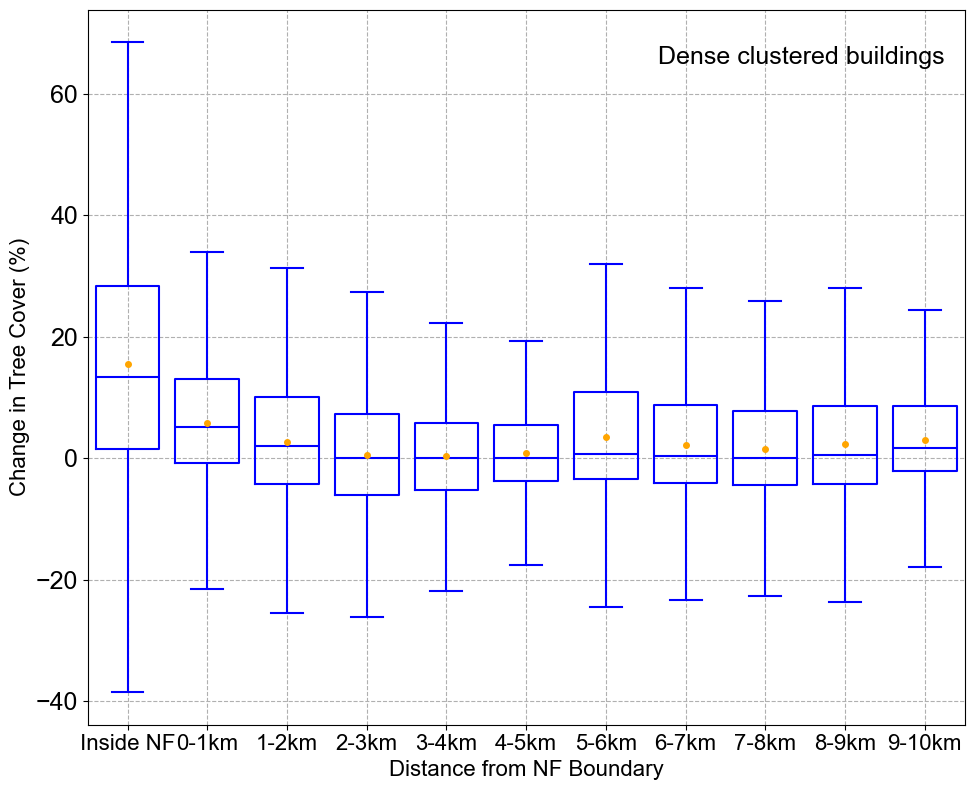

In [6]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Create and beautify boxplot
plt.figure(figsize=(10, 8))
# sbufferjoinhousefhsz['treeratiochange']*=100
# Create boxplot with unfilled boxes and uniform color
sns.boxplot(
    x='distance_group',
    y='treeratiochange',  # Replace with your actual tree cover change column name
    data=sbufferjoinhousefhsz.query('newhouse==0 and housingdensityclass155082=="dense"'),
    color='blue',       # Uniform color for all boxes
    fill=False,  # No fill (outline only)
    showmeans=True,
    showfliers=False,  # Explicitly show outliers
    order=['Inside NF'] + [f'{i}-{i+1}km' for i in range(0, 10)],  # Ensure correct order
    linewidth=1.5,         # Thicker lines for better visibility
    
    meanprops={  # Customize the mean marker
        'marker': 'o',        # Circle marker
        'markerfacecolor': 'orange',  # Orange fill color
        'markeredgecolor': 'orange',  # Orange edge color (optional)
        'markersize': 4     # Adjust size as needed
    }
)


# Customize the plot
# plt.title('Tree Cover Change by Distance from National Forest Boundary', 
#           fontsize=14, pad=15)
# Add a patch label 'Very dense' in the upper left as a legend
# very_dense_patch = mpatches.Patch(color='blue', label='Very dense')
# plt.text(0.6, 0.95, 'Very dense clustered buildings', transform=plt.gca().transAxes, fontsize=18, verticalalignment='top')
plt.text(0.65, 0.95, 'Dense clustered buildings', transform=plt.gca().transAxes, fontsize=18, verticalalignment='top')
# plt.text(0.74, 0.95, 'Isolated buildings', transform=plt.gca().transAxes, fontsize=20, verticalalignment='top')
# plt.text(0.7, 0.95, 'Scattered buildings', transform=plt.gca().transAxes, fontsize=20, verticalalignment='top')

plt.xlabel('Distance from NF Boundary', fontsize=16)
plt.ylabel('Change in Tree Cover (%)', fontsize=16)
plt.xticks(rotation=0, fontsize=16)
plt.yticks(fontsize=18)

# Add a subtle grid
plt.grid(True, linestyle='--', alpha=1)
plt.tight_layout()
# plt.gca().set_facecolor('#f5f5f5')  # Light grey background
# plt.gcf().set_facecolor('white')     # White figure background

# Show plot
plt.show()



In [177]:
len(sbufferjoinhousefhsz.query('newhouse==0 and housingdensityclass155082=="isloated" and distance_group!=">10km"'))/len(sbufferjoinhousefhsz.query('newhouse==0 and housingdensityclass155082=="isloated" and distance_group==">10km"'))

1.5638671875

In [13]:
sbufferjoinhousefhsz['distance_group'] = sbufferjoinhousefhsz['distance_group'].replace('Inside NF', 'Inside')

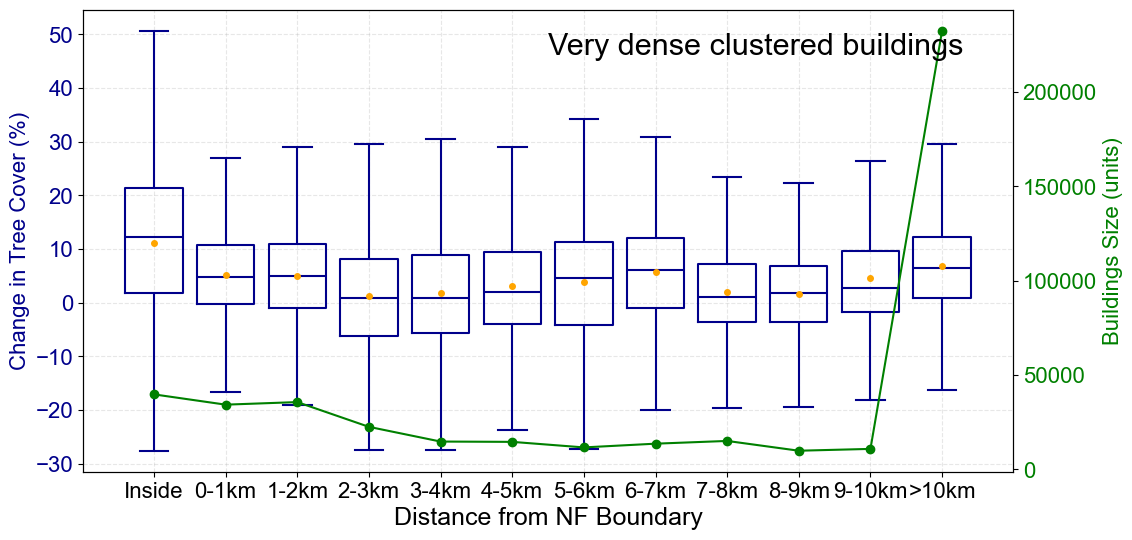

Summary statistics for tree_cover_change:


In [23]:
# Calculate sample sizes sbufferjoinhousefhszfor each distance group
sample_sizes = sbufferjoinhousefhsz.query('newhouse==0 and housingdensityclass155082=="very dense"')['distance_group'].value_counts().reindex(
    ['Inside'] + [f'{i}-{i+1}km' for i in range(0, 10)]+[">10km"], fill_value=0
)

# Create figure and twin axes
fig, ax1 = plt.subplots(figsize=(12, 6))
ax2 = ax1.twinx()  # Second y-axis

# Boxplot on the left y-axis (ax1)
sns.boxplot(
    x='distance_group',
    y='treeratiochange',  # Replace with your actual column name
    data=sbufferjoinhousefhsz.query('newhouse==0 and housingdensityclass155082=="very dense"'),
    color='darkblue',
    fill=False,
    order=['Inside'] + [f'{i}-{i+1}km' for i in range(0, 10)]+[">10km"],
    linewidth=1.5,
    showmeans=True,
    showfliers=False,
    flierprops={'marker': 'o', 'markersize': 5, 'markerfacecolor': 'red', 'markeredgecolor': 'red'},
    ax=ax1,
    meanprops={  # Customize the mean marker
        'marker': 'o',        # Circle marker
        'markerfacecolor': 'orange',  # Orange fill color
        'markeredgecolor': 'orange',  # Orange edge color (optional)
        'markersize': 4     # Adjust size as needed
    }
)

# Sample size curve on the right y-axis (ax2)
ax2.plot(
    sample_sizes.index,
    sample_sizes.values,
    color='green',
    linestyle='-', 
    marker='o',
    markersize=6,
    label='Buildings Size (units)',
    
)

# Customize ax1 (left y-axis - boxplot)
# ax1.set_title('Tree Cover Change and Sample Size by Distance from NF Boundary', fontsize=14, pad=15)
ax1.set_xlabel('Distance from NF Boundary', fontsize=18)
ax1.set_ylabel('Change in Tree Cover (%)', fontsize=16, color='darkblue')
ax1.tick_params(axis='y', labelcolor='darkblue', labelsize=16)
ax1.grid(True, linestyle='--', alpha=0.3)
ax1.set_xticks(range(len(sample_sizes.index)))
ax1.set_xticklabels(sample_sizes.index, rotation=0, fontsize=16)

# Customize ax2 (right y-axis - sample size curve)
ax2.set_ylabel('Buildings Size (units)', fontsize=16, color='green')
ax2.tick_params(axis='y', labelcolor='green',labelsize=16)
plt.text(0.5, 0.95, 'Very dense clustered buildings', transform=plt.gca().transAxes, fontsize=22, verticalalignment='top')
# plt.tight_layout()

# Show plot
plt.show()

# Print stats
print("Summary statistics for tree_cover_change:")


### Land use change

In [ ]:
def addratio(df):
    df['grassratio2010']=df['areagrass2010']/df['areaall2010']
    df['bareratio2010']=df['areabare2010']/df['areaall2010']
    df['imperratio2010']=df['areaurban2010']/df['areaall2010']
    
    df['grassratio2022']=df['areagrass2022']/df['areaall2022']
    df['bareratio2022']=df['areabare2022']/df['areaall2022']
    df['imperratio2022']=df['areaurban2022']/df['areaall2022']
    
    # df=df.assign(area=df.groupby('cluster2022unique')['areahouse'].transform(lambda x: x.sum()))
    # df['areahouseandbufferbycluster2022']=df['areahousebycluster2022']+df['areaall2022']
    # df['housedensitybycluster2022'] = (
    #     df.groupby('cluster2022unique')['areahousebycluster2022'].transform('mean') /
    #     df.groupby('cluster2022unique')['areahouseandbufferbycluster2022'].transform('mean')
    # )
    # plt.boxplot(df['grassratio2010'], 
    #                         patch_artist=True, showfliers=False, showmeans=False,medianprops={'color': 'red', 'linewidth': 1})
    
    # print(df.drop_duplicates('cluster2010unique').groupby('WUIFLAG202')[['imperratio2010','bareratio2010','treeratio2010','grassratio2010']].describe())
    # print(df.drop_duplicates('cluster2022unique').groupby('WUIFLAG202')[['imperratio2022','bareratio2022','treeratio2022','grassratio2022']].describe())
    
    return df
sat1022high1=addratio(sbufferjoinhousefhsz)
sat1022high1['urbanratiochange']=sat1022high1['imperratio2022']-sat1022high1['imperratio2010']
sat1022high1['bareratiochange']=sat1022high1['bareratio2022']-sat1022high1['bareratio2010']
sat1022high1['grassratiochange']=sat1022high1['grassratio2022']-sat1022high1['grassratio2010']

sat1022highaggarea2022=sat1022high1.query('newhouse==0 and treeratiochange>0').drop_duplicates('cluster2022')\
.groupby('housingdensityclass155082').agg({
    'housingdensityclass155082':'first',
    'areaurban2022':'sum',
    'areabare2022':'sum',
    'areatree2022':'sum',
    'areagrass2022':'sum',
    'areaall2022':'sum',
       
}).reset_index(drop=True)
sat1022highaggarea2010= sat1022high1.query('newhouse==0 and treeratiochange>0').drop_duplicates('cluster2010')\
.groupby('housingdensityclass155082').agg({
    
    'housingdensityclass155082':'first',
    'areaurban2010':'sum',
    'areabare2010':'sum',
    'areatree2010':'sum',
    'areagrass2010':'sum',
    'areaall2010':'sum',    
}).reset_index(drop=True)
sat1022highaggarea=pd.concat([sat1022highaggarea2010,sat1022highaggarea2022],axis=1)
sat1022highaggarea['urbanratio2010']=100*sat1022highaggarea['areaurban2010']/sat1022highaggarea['areaall2010']
sat1022highaggarea['urbanratio2022']=100*sat1022highaggarea['areaurban2022']/sat1022highaggarea['areaall2022']

sat1022highaggarea['bareratio2010']=100*sat1022highaggarea['areabare2010']/sat1022highaggarea['areaall2010']
sat1022highaggarea['bareratio2022']=100*sat1022highaggarea['areabare2022']/sat1022highaggarea['areaall2022']

sat1022highaggarea['grassratio2010']=100*sat1022highaggarea['areagrass2010']/sat1022highaggarea['areaall2010']
sat1022highaggarea['grassratio2022']=100*sat1022highaggarea['areagrass2022']/sat1022highaggarea['areaall2022']


sat1022highaggarea['treeratio2010']=100*sat1022highaggarea['areatree2010']/sat1022highaggarea['areaall2010']
sat1022highaggarea['treeratio2022']=100*sat1022highaggarea['areatree2022']/sat1022highaggarea['areaall2022']
sat1022highaggarea


In [280]:
### including edge data
sbufferjoinhousefhszedge=gpd.read_file('../statistic/vegechange/vege_housetype/buffer1550m82.gpkg')
sbufferjoinhousefhsz.groupby('WUIFLAG202')['housingdensityclass155082'].value_counts()
sbufferjoinhousefhszedge[sbufferjoinhousefhszedge['WUIFLAG202'].isna()].groupby('COUNTYFP').size()

In [ ]:
fps = ["079","083", "111", "037","059","073","065","071","029"]
wui=gpd.read_file('../wuicorrected_shapefile.shp').to_crs("epsg:4326")
wui = wui[wui['COUNTYFP'].isin(fps)]

## 统计每个县树覆盖率变化

In [ ]:
def treechangebycounty(df):

    treeratiochange=df.query('newhouse==0').groupby(['COUNTY'])['treeratiochange'].mean().to_frame('treeratiochange').reset_index()
    treeratio2010=df.query('newhouse==0').groupby(['COUNTY'])['treeratio2010'].mean().to_frame('treeratio2010').reset_index()
    treeratio2022=df.query('newhouse==0').groupby(['COUNTY'])['treeratio2022'].mean().to_frame('treeratio2022').reset_index()
    
    treerise=df.query('newhouse==0 and treeratiochange>0').groupby(['COUNTY']).size().to_frame('treerisecount').reset_index()
    oldall=df.query('newhouse==0').groupby(['COUNTY']).size().to_frame('oldbuildingsallcount').reset_index()
    treechange=treeratio2010.merge(treeratio2022,on=['COUNTY'],how='left')\
    .merge(treeratiochange,on=['COUNTY'],how='left')\
    .merge(treerise,on=['COUNTY'],how='left')\
    # .merge(oldall,on=['COUNTY'],how='left')
    
    treechange.iloc[:,1:4]=treechange.iloc[:,1:4]*100
    # treechange['ratioofbuildings']=100*treechange['treerisecount']/treechange['oldbuildingsallcount']
    # treechange.to_csv('../statistic/table/newfhsz/treeratiochangebycounties.csv')
    print(treechange)
    # oldnew=newnearold.merge(oldwithnew,on=['COUNTY'],how='left')
    # oldnew['oldwithnewratio']=oldnew['Old buildings with new (units)']/oldnew['New buildings near old (units)']

treechangebycounty(sbufferjoinhousefhsz)

            COUNTY  treeratio2010  treeratio2022  treeratiochange  \
0             Kern      13.820049       9.971492        -3.848557   
1      Los Angeles      14.655098      18.231213         3.576114   
2           Orange      11.253064      18.126493         6.873429   
3        Riverside       7.042191      11.010462         3.968271   
4   San Bernardino      10.889100      17.937137         7.048037   
5        San Diego      10.312636      21.829807        11.517171   
6  San Luis Obispo      18.208325      17.154499        -1.053826   
7    Santa Barbara      24.214406      26.691764         2.477359   
8          Ventura      16.638708      21.379473         4.740766   

   treerisecount  
0           8433  
1         108785  
2          41665  
3          60293  
4          61347  
5         141744  
6          13039  
7          12336  
8          38940  


In [94]:
0.1824-0.1254

0.056999999999999995

In [11]:

sbufferjoinhousefhsz.query('newhouse==0')[['treeratio2010','treeratio2022']].mean()

treeratio2010   0.125441
treeratio2022   0.182361
dtype: float64

In [26]:
def caltreeratiochangebycountyandhousetype(df):


    oldallrise = df.query('treeratiochange>0').groupby(['COUNTY', 'housingdensityclass155082']).size().unstack(fill_value = 0).reset_index()
    oldallrise=oldallrise.rename(columns={
      'dense':'risedense',
      'very dense':'riseverydense',
      'isloated':'riseloated',
      'scattered':'risescattered', 
    })
    
#     oldallrise = pd.pivot_table(
#     df.query('treeratiochange > 0'),  # 过滤数据
#     index='COUNTY',  # 行索引
#     columns='housingdensityclass155082',  # 列索引
#     aggfunc='size',  # 聚合函数，计算每个组的数量
#     fill_value=0  # 缺失值填充为 0
# ).reset_index()  # 重置索引

    oldall = df.groupby(['COUNTY', 'housingdensityclass155082']).size().unstack(fill_value = 0).reset_index()
    

    
    # print(df.query('treeratiochange>0').groupby(['COUNTY', 'housingdensityclass155082']).size())
    print(oldallrise)
    # print(oldall.columns)
    treechange=oldallrise.merge(oldall,on=['COUNTY'],how='left')
    
    house_type_columns = [col for col in treechange.columns if col != 'COUNTY']
    for col in house_type_columns:
        total_count = treechange[col].sum()
        if total_count == 0:
          treechange[col + '_proportion'] = 0
        else:
          treechange[col + '_ratio'] = treechange[col] / total_count
    print(treechange)


    # treechange.to_csv('../statistic/table/newfhsz/treeratiochangebycountiesandtype.csv')
    return treechange
caltreeratiochangebycountyandhousetype(sbufferjoinhousefhsz.query('newhouse==0'))

housingdensityclass155082           COUNTY  dense  isloated  scattered  \
0                                     Kern   3985       713       1429   
1                              Los Angeles  12700      1122       4523   
2                                   Orange   2238       120        897   
3                                Riverside  15165      3183       9855   
4                           San Bernardino  13462      1042       3895   
5                                San Diego  36165      5507      15159   
6                          San Luis Obispo   2851      1861       3340   
7                            Santa Barbara   4328       849       2137   
8                                  Ventura   4694       683       2331   

housingdensityclass155082  very dense  
0                                2306  
1                               90440  
2                               38410  
3                               32090  
4                               42948  
5                  

housingdensityclass155082           COUNTY  dense_x  isloated_x  scattered_x  \
0                                     Kern     3985         713         1429   
1                              Los Angeles    12700        1122         4523   
2                                   Orange     2238         120          897   
3                                Riverside    15165        3183         9855   
4                           San Bernardino    13462        1042         3895   
5                                San Diego    36165        5507        15159   
6                          San Luis Obispo     2851        1861         3340   
7                            Santa Barbara     4328         849         2137   
8                                  Ventura     4694         683         2331   

housingdensityclass155082  very dense_x  dense_y  isloated_y  scattered_y  \
0                                  2306    10303        1845         4239   
1                                 90440    20987        2422         8603   
2                                 38410     2941         175         1140   
3                                 32090    23651        5300        16563   
4                                 42948    26917        3263        10548   
5                                 84913    43268        7033        18464   
6                                  4987     7379        3986         8325   
7                                  5022     6988        1242         3088   
8                                 31232     6774         988         3265   

housingdensityclass155082  very dense_y  dense_x_ratio  isloated_x_ratio  \
0                                 12291       0.041689          0.047281   
1                                149032       0.132862          0.074403   
2                                 48293       0.023413          0.007958   
3                                 40719       0.158650          0.211074   
4                                 51731       0.140834          0.069098   
5                                 91181       0.378342          0.365186   
6                                  9047       0.029826          0.123408   
7                                  9812       0.045278          0.056300   
8                                 43703       0.049107          0.045292   

housingdensityclass155082  scattered_x_ratio  very dense_x_ratio  \
0                                   0.032801            0.006939   
1                                   0.103819            0.272124   
2                                   0.020589            0.115572   
3                                   0.226209            0.096555   
4                                   0.089405            0.129226   
5                                   0.347955            0.255494   
6                                   0.076665            0.015005   
7                                   0.049052            0.015111   
8                                   0.053505            0.093974   

housingdensityclass155082  dense_y_ratio  isloated_y_ratio  scattered_y_ratio  \
0                               0.069051          0.070275           0.057102   
1                               0.140656          0.092253           0.115889   
2                               0.019711          0.006666           0.015357   
3                               0.158510          0.201874           0.223116   
4                               0.180399          0.124286           0.142089   
5                               0.289984          0.267883           0.248724   
6                               0.049454          0.151824           0.112144   
7                               0.046834          0.047307           0.041598   
8                               0.045400          0.037632           0.043982   

housingdensityclass155082  very dense_y_ratio  
0                                    0.026965  
1                                    0.326962  
2                              

In [ ]:
def calhousecountbyhousetype(df):

    oldall = df.query('newhouse==0').groupby(['housingdensityclass155082']).size().to_frame('oldhousetype').reset_index()
    newall = df.query('newhouse==1').groupby(['housingdensityclass155082']).size().to_frame('newhousetype').reset_index()
    treechange=oldall.merge(newall,on=['housingdensityclass155082'],how='left')
    
    

    # treechange.to_csv('../statistic/table/newfhsz/treeratiochangebytype.csv')
    return treechange
calhousecountbyhousetype(sbufferjoinhousefhsz)

In [ ]:
def caltreerisebydensity(df):
    treerise=df.query('newhouse==0 and treeratiochange>0').groupby(['COUNTY','housingdensityclass155082']).size().to_frame().unstack(fill_value = 0).reset_index()
    oldall=df.query('newhouse==0').groupby(['COUNTY','housingdensityclass155082']).size().to_frame().unstack(fill_value = 0).reset_index()
    treechange=treerise.merge(oldall,on=['COUNTY','housingdensityclass155082'],how='left')

    treechange['ratioofbuildings']=100*treechange['treerisecount']/treechange['oldbuildingsallcount']
    print(treechange)
    return treechange
caltreerisebydensity(sbufferjoinhousefhsz)


## 绘制堆积条形图

In [12]:
def housetypebycounty(df,tag):
    if tag=='old':
        treechange = df.query('newhouse==0').groupby(['COUNTY', 'housingdensityclass155082']).size().unstack(fill_value = 0)\
        .add_prefix('old_').reset_index()
    if tag=='oldwithnew':
        treechange = df.query('newhouse==0 and newhcount>0').groupby(['COUNTY', 'housingdensityclass155082']).size().unstack(fill_value = 0)\
        .add_prefix('oldwithnew_').reset_index()
    
    house_type_columns = [col for col in treechange.columns if col != 'COUNTY']
    # create a dict
    totals = {col: treechange[col].sum() for col in house_type_columns}
    print(totals)
    grand_total = sum(totals.values())
    
    # The ** operator is used to unpack the contents of a dictionary,**totals unpack the key into columns name, value into the value of this column
    total_row = pd.DataFrame({
        'COUNTY': ['Total'],  
        **totals
    })
    
    print(total_row)
    # Add ratio columns and calculate ratios
    for col in house_type_columns:
        total_count = totals[col]
        if total_count == 0:
            treechange[col + '_ratio'] = 0
            total_row[col + '_ratio'] = 0
        else:
            treechange[col + '_ratio'] = 100 * treechange[col] / total_count
            # For total row, ratio is column total / grand total
            total_row[col + '_ratio'] = 100 * total_count / grand_total
    
    # Combine original dataframe with total row
    treechange = pd.concat([treechange, total_row], ignore_index=True)
    return treechange
oldcountyhousetype=housetypebycounty(sbufferjoinhousefhsz,'old')
newcountyhousetype=housetypebycounty(sbufferjoinhousefhsz,'oldwithnew')
allcountyhousetype=oldcountyhousetype.merge(newcountyhousetype,on=['COUNTY'],how='left')

{'old_dense': 149208, 'old_isloated': 26254, 'old_scattered': 74235, 'old_very dense': 455809}
  COUNTY  old_dense  old_isloated  old_scattered  old_very dense
0  Total     149208         26254          74235          455809
{'oldwithnew_dense': 5491, 'oldwithnew_isloated': 239, 'oldwithnew_scattered': 2669, 'oldwithnew_very dense': 79131}
  COUNTY  oldwithnew_dense  oldwithnew_isloated  oldwithnew_scattered  \
0  Total              5491                  239                  2669   

   oldwithnew_very dense  
0                  79131  


In [13]:
def oldbuildingswithnewbyhousetypeandcounty(df,tag):

    treechange = df.query('newhouse==0 and newhcount>0').groupby(['COUNTY', 'housingdensityclass155082']).size().unstack(fill_value = 0).add_prefix('old_').reset_index()
    house_type_columns = [col for col in treechange.columns if col != 'COUNTY']
    totals = {col: treechange[col].sum() for col in house_type_columns}

    grand_total = sum(totals.values())
    
    # Create a total row
    total_row = pd.DataFrame({
        'COUNTY': ['Total$^{[1]}$'],  
        **totals
    })
    # Add ratio columns and calculate ratios
    for col in house_type_columns:
        total_count = totals[col]
        if total_count == 0:
            treechange[col + '_ratio'] = 0
            total_row[col + '_ratio'] = 0
        else:
            treechange[col + '_ratio'] = 100 * treechange[col] / total_count
            # For total row, ratio is column total / grand total
            total_row[col + '_ratio'] = 100 * total_count / grand_total
    
    # Combine original dataframe with total row
    treechange = pd.concat([treechange, total_row], ignore_index=True)
    print(treechange)
    return treechange
oldwithnewbyhousetypeandcounty=oldbuildingswithnewbyhousetypeandcounty(sbufferjoinhousefhsz,'old')


            COUNTY  old_dense  old_isloated  old_scattered  old_very dense  \
0             Kern        177             1             49            1537   
1      Los Angeles        904            34            446           36375   
2           Orange        153             3              9            6661   
3        Riverside        709            46            539            5002   
4   San Bernardino        862            31            367           10292   
5        San Diego       2022            72            877           11316   
6  San Luis Obispo         38             7             68            1212   
7    Santa Barbara        381            32            176            1384   
8          Ventura        245            13            138            5352   
9    Total$^{[1]}$       5491           239           2669           79131   

   old_dense_ratio  old_isloated_ratio  old_scattered_ratio  \
0         3.223457            0.418410             1.835894   
1        16.463

In [375]:
allcountyhousetype.to_csv('../statistic/table/newfhsz/housetypebycounty.csv')

In [ ]:
allcountyhousetype

### oldwithnew and old in the same pictures

In [ ]:

def plot_county_ratios(df, figsize=(12, 8)):
    colors = ['#d7191c', '#e3e928', '#25c94b', '#9999fb']
    colors = ['#ffa500', '#e3e92880', '#25c94b80', '#9999fb80']
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
    
    # 新建筑比例图（右侧）
    new_ratio_columns = ['oldwithnew_very dense_ratio', 'oldwithnew_dense_ratio',
                        'oldwithnew_scattered_ratio', 'oldwithnew_isloated_ratio']
    new_legend_names = ['Very dense', 'Dense',
                       'Scattered', 'Isolated']
    
    # 旧建筑比例图（左侧）
    old_ratio_columns = ['old_very dense_ratio', 'old_dense_ratio',
                        'old_scattered_ratio', 'old_isloated_ratio']
    old_legend_names = ['Very dense', 'Dense',
                       'Scattered', 'Isolated']
    
    # 排序逻辑
    df_sorted= df.sort_values('old_very dense_ratio', ascending=True)
    county_order = df_sorted['COUNTY'].tolist()
    orange_idx = county_order.index('Orange')
    county_order.remove('Riverside')
    county_order.insert(orange_idx, 'Riverside')
    df = df_sorted.set_index('COUNTY').loc[county_order].reset_index()
    
    # 绘制右侧新建筑图
    left_new = np.zeros(len(df))
    for ratio, color, legend in zip(new_ratio_columns, colors, new_legend_names):
        ax2.barh(df['COUNTY'], df[ratio], left=left_new, color=color,edgecolor='black', linewidth=1,
                 label=legend)
        left_new += df[ratio]
    
    # 绘制左侧旧建筑图
    left_old = np.zeros(len(df))
    for ratio, color, legend in zip(old_ratio_columns, colors, old_legend_names):
        ax1.barh(df['COUNTY'], -df[ratio], left=left_old, color=color,edgecolor='black', linewidth=1,
                 label=legend)
        left_old -= df[ratio]
    
    # 设置标签和格式
    ax1.set_xlabel('Proportion of old buildings across counties\nby building types', fontsize=12)
    ax2.set_xlabel('Proportion of old buildings near new across counties\nby building types', fontsize=12)
    
    ax1.tick_params(axis='y', labelsize=14)

    ax1.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: f'{abs(x):.0f}'))
    ax1.tick_params(axis='x', labelsize=12)
    ax2.tick_params(axis='x', labelsize=12)
    
    # 移除右侧图y轴标签
    ax2.set_yticklabels('')
    ax2.tick_params(axis='y',length=0)
    # ax2.set_axis_off()
    # ax1.set_axis_off()
    
    
    # 添加图例
    ax1.legend(loc='lower left', bbox_to_anchor=(0, 0), fontsize=14,title='Old buildings',alignment='center',title_fontsize=15)
    ax2.legend(loc='lower right', bbox_to_anchor=(1, 0), fontsize=14,title='Old buildings near new',alignment='center',title_fontsize=15)
    
    plt.tight_layout()
    return fig, (ax1, ax2)

fig, (ax1, ax2) = plot_county_ratios(allcountyhousetype)
plt.show()

### 单独pictures

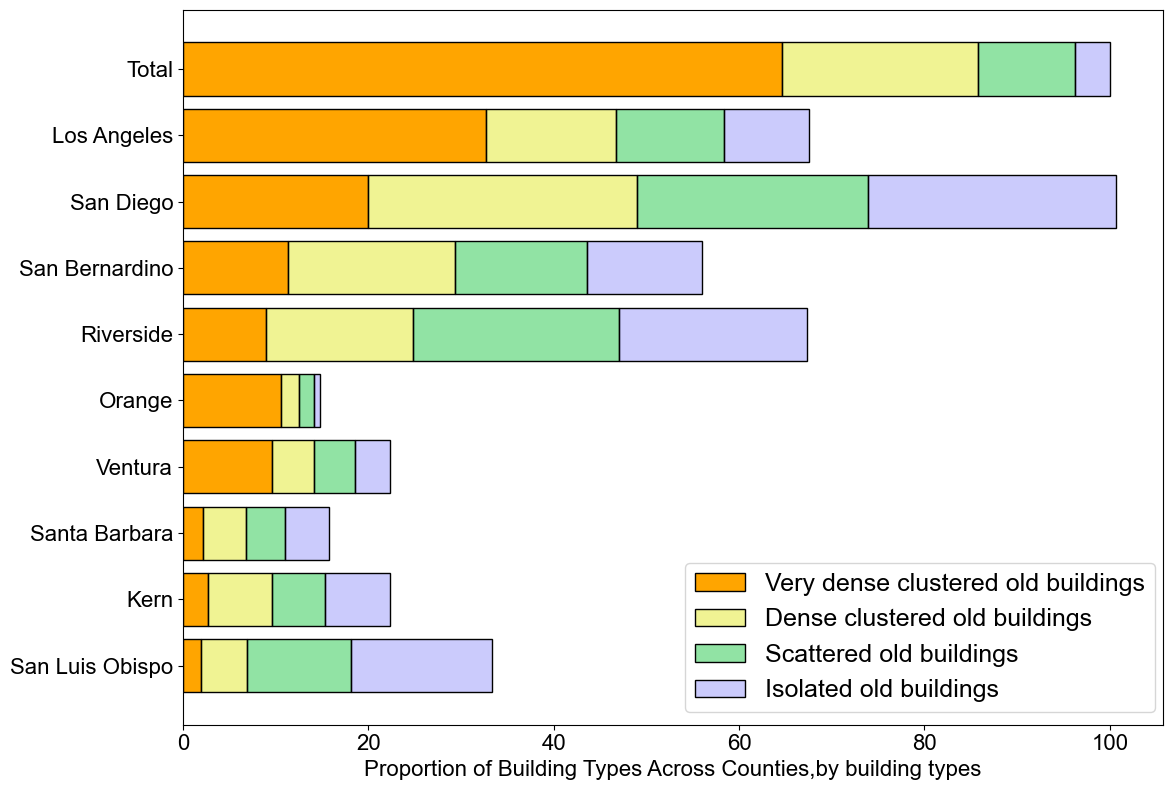

In [16]:
def plot_county_ratios(df,tag):
    
    colors = ['Orange', '#e3e92880', '#25c94b80', '#9999fb80']
    fig, ax = plt.subplots(figsize=(12,8))
    if tag=='oldwithnew':
        ratio_columns = ['oldwithnew_very dense_ratio', 'oldwithnew_dense_ratio', 
                        'oldwithnew_scattered_ratio', 'oldwithnew_isloated_ratio']
        
        legend_names = ['Very dense old buildings near new', 'Dense old buildings near new',
                    'Scattered old buildings near new', 'Isolated old buildings near new']
        
        df_sorted = df.sort_values('oldwithnew_very dense_ratio', ascending=True)
    else:
        ratio_columns = ['old_very dense_ratio', 'old_dense_ratio', 
                        'old_scattered_ratio', 'old_isloated_ratio']
        
        legend_names = ['Very dense clustered old buildings', 'Dense clustered old buildings',
                    'Scattered old buildings', 'Isolated old buildings']
        
        df_sorted = df.sort_values('old_very dense_ratio', ascending=True)
        
    # 获取当前排序后的county列表
    county_order = df_sorted['COUNTY'].tolist()
    
    # 找到Orange和Riverside的位置
    orange_idx = county_order.index('Orange')
    riverside_idx = county_order.index('Riverside')
    # 调整顺序
    county_order.remove('Riverside')
    county_order.insert(orange_idx, 'Riverside')
    
    orange_idx = county_order.index('Santa Barbara')
    riverside_idx = county_order.index('Kern')
    # 调整顺序
    county_order.remove('Kern')
    county_order.insert(orange_idx, 'Kern')
    
    
    # 根据新顺序重排数据框
    df = df_sorted.set_index('COUNTY').loc[county_order].reset_index()
    
    left = np.zeros(len(df))
    
    

    
    left = np.zeros(len(df))
    
    for ratio, color, legend in zip(ratio_columns, colors, legend_names):
        ax.barh(df['COUNTY'], df[ratio], left=left, color=color, edgecolor='black', linewidth=1,
                label=legend)
        left += df[ratio]
    
    ax.set_xlabel('Proportion of Building Types Across Counties,by building types',fontsize=16)
    ax.tick_params(axis='y', labelsize=16)
    ax.tick_params(axis='x', labelsize=16)


    
     

    ax.legend(loc='lower left', bbox_to_anchor=(0.5, 0),fontsize=18)
    plt.tight_layout() 
    return fig, ax

fig, ax = plot_county_ratios(allcountyhousetype,'old')
plt.show()

In [183]:
print(1506+748+280+383+145+608+274+410+185+515+363+346+136+886)
6785+2055

6785


8840

In [ ]:
len(sbufferjoinhousefhsz.query('newhouse==0 and treeratiochange>0'))/len(sbufferjoinhousefhsz.query('newhouse==0'))

In [ ]:
sbufferjoinhousefhsz['treeratio2022'].mean()

## 统计oldwithnew

In [ ]:
def oldwithnew(df):
    # old=df.query('newhouse==0')groupby(['COUNTY'])['treeratiochange'].to_frame('Old buildings (units)').reset_index()
    # new=df.groupby(['housingdensityclass']).size().to_frame('New buildings (units)').reset_index()

    # oldnew=old.merge(new,on=['housingdensityclass'],how='left')

    # oldnew.to_csv('../statistic/table/oldnewhousebydensity.csv')
    oldwithnew=df.query('newhouse==0 and (newhcount>0)').groupby(['COUNTY']).size().to_frame('Old buildings with new (units)').reset_index()
    newnearold=df.query('newhouse==1 and (allhcount!=newhcount)').groupby(['COUNTY']).size().to_frame('New buildings near old (units)').reset_index()
    newcounts=df.query('newhouse==1').groupby(['COUNTY']).size().to_frame('New buildings (units)').reset_index()
    oldnew=newnearold.merge(oldwithnew,on=['COUNTY'],how='left').merge(newcounts,on=['COUNTY'],how='left')
    oldnew['oldwithnewratio']=oldnew['Old buildings with new (units)']/oldnew['New buildings near old (units)']
    oldnew['newwitholdratio']=oldnew['New buildings near old (units)']/oldnew['Old buildings with new (units)']
    print(oldnew)

    oldnew.to_csv('../statistic/table/result1.csv')
oldwithnew(sbufferjoinhousefhsz)

In [ ]:
def oldwithnewbuildingtype(df):

    oldwithnew=df.query('newhouse==0 and (newhcount>0)').groupby(['COUNTY']).size().to_frame('Old buildings with new (units)').reset_index()
    
    oldwithoutnew=df.query('newhouse==0 and (newhcount==0)').groupby(['COUNTY']).size().to_frame('Old buildings without new (units)').reset_index()
    
    
    oldnew=oldwithnew.merge(oldwithoutnew,on=['COUNTY'],how='left')
    oldnew['Old buildings (units)']=(oldnew['Old buildings with new (units)']+oldnew['Old buildings without new (units)'])
    oldnew['oldwithnewratio']=100*oldnew['Old buildings with new (units)']/(oldnew['Old buildings with new (units)']+oldnew['Old buildings without new (units)'])
    print(oldnew)

    oldnew.to_csv('../statistic/table/newfhsz/oldwithnewratiobycounty.csv')
oldwithnewbuildingtype(sbufferjoinhousefhsz)

In [ ]:
def oldwithnewbuildingtypemeanmedian(df):

    oldwithnewmean=df.query('newhouse==0 and (newhcount>0)').groupby(['housingdensityclass155082'])['treeratiochange'].mean().to_frame('Mean treeratiochange of Old with new').reset_index()
    oldwithoutnewmean=df.query('newhouse==0 and (newhcount==0)').groupby(['housingdensityclass155082'])['treeratiochange'].mean().to_frame('Mean treeratiochange of Old without new').reset_index()
    
    oldwithnewmedian=df.query('newhouse==0 and (newhcount>0)').groupby(['housingdensityclass155082'])['treeratiochange'].median().to_frame('Median treeratiochange of Old with new').reset_index()
    oldwithoutnewmedian=df.query('newhouse==0 and (newhcount==0)').groupby(['housingdensityclass155082'])['treeratiochange'].median().to_frame('Median treeratiochange of Old without new').reset_index()
    
    oldnew=oldwithnewmean.merge(oldwithoutnewmean,on=['housingdensityclass155082'],how='left')\
    .merge(oldwithnewmedian,on=['housingdensityclass155082'],how='left').merge(oldwithoutnewmedian,on=['housingdensityclass155082'],how='left')
    
    oldnew.iloc[:,1:5]= oldnew.iloc[:,1:5]*100
    oldnew['oldwithnewmeandiff']=oldnew['Mean treeratiochange of Old with new']-oldnew['Mean treeratiochange of Old without new']
    
    oldnew['oldwithnewmediandiff']=oldnew['Median treeratiochange of Old with new']-oldnew['Median treeratiochange of Old without new']
    
    print(oldnew)

    oldnew.to_csv('../statistic/table/newfhsz/oldwithnewratiomeanmedian.csv')
oldwithnewbuildingtypemeanmedian(sbufferjoinhousefhsz)

In [ ]:
def caloldwithnewhouseclass(df):

    treechange = df.query('newhouse==0 and newhcount>0').groupby(['COUNTY', 'housingdensityclass155082']).size().unstack(fill_value = 0)\
    .add_prefix('old_').reset_index()
    # oldall = df.query('newhouse==0').groupby(['COUNTY', 'housingdensityclass155082']).size().unstack(fill_value = 0)\
    # .add_prefix('new_').reset_index()
    # treechange=oldwithnewall.merge(oldall,on=['COUNTY'],how='left')

    house_type_columns = [col for col in treechange.columns if col != 'COUNTY']
    for col in house_type_columns:
        # Calculate total for each column
        total_count = treechange[col].sum()
        # avoid division by zero
        if total_count == 0:
          treechange[col + '_proportion'] = 0
        else:
          # Create the new proportion column
          treechange[col + '_ratio'] = 100*treechange[col] / total_count
    print(treechange)


    # treechange.to_csv('../statistic/table/newfhsz/oldwithnewhousetyperatiobycounty.csv')
    return treechange
caloldwithnewhouseclass(sbufferjoinhousefhsz)

## Building ratios under different tree rise level

### 统计oldhouse树覆盖率变化

In [4]:
sbufferjoinhousefhsz=gpd.read_file('../statistic/vegechange/vege_housetype/fhszvegechangeanddensityclass.gpkg')


In [18]:
sbufferjoinhousefhsz.groupby('newhouse')['housingdensityclass155082'].value_counts()

newhouse  housingdensityclass155082
0.000000  very dense                   455809
          dense                        149208
          scattered                     74235
          isloated                      26254
1.000000  very dense                    25810
          dense                          7240
          scattered                      4619
          isloated                       1206
Name: count, dtype: int64

In [ ]:
sbufferjoinhousefhsz.query('COUNTYFP=="037"')['cluster2010'].head(1)

In [425]:

df0=pd.DataFrame(columns=['COUNTYFP','treeriseratio',
                          
                           'hurban','lurban','surban','hrural',
                    
                            'hurbanhousecountall','lurbanhousecountall','surbanhousecountall','hruralhousecountall',
                      
                   
             
                          'highdensityurbanmeantreechange','lowdensityurbanmeantreechange', 'singleurbanmeantreechange','highdensityruralmeantreechange'
                       ])



def calvege(dfa,ratio,fp):
    if fp=='all':
        dfall1=dfa
    
    else:
        dfall1 = dfa[dfa['COUNTYFP'].isin(fp)] 
    if ratio>=0:
        treerise = dfall1[dfall1['treeratiochange']>ratio]
    if ratio==-0.001:
        treerise = dfall1[dfall1['treeratiochange']<0]
    if ratio<0:
        treerise = dfall1[dfall1['treeratiochange']<ratio]
    treeriseratio = len(treerise) / len(dfall1)
    meantreechange=treerise['treeratiochange'].mean()
  
    return len(dfall1),treeriseratio,meantreechange



                
def calculate_ratios_by_counties(hurban,lurban,surban,hrural,treeriseratio,fp):


    hurbanhousecountall,treeriseratiohurban,highdensityurbanmeantreechange=calvege(hurban,treeriseratio,fp)
    lurbanhousecountall,treeriseratiolurban,lowdensityurbanmeantreechange=calvege(lurban,treeriseratio,fp)
    surbanhousecountall,treeriseratiosurban,singleurbanmeantreechange=calvege(surban,treeriseratio,fp)


    hruralhousecountall,treeriseratiohrural,highdensityruralmeantreechange=calvege(hrural,treeriseratio,fp)
  



    df0.loc[len(df0)] = [fp,treeriseratio,

                         treeriseratiohurban,treeriseratiolurban,treeriseratiosurban,
                         treeriseratiohrural,

                        hurbanhousecountall,lurbanhousecountall,surbanhousecountall,
                        hruralhousecountall,
                         
                         highdensityurbanmeantreechange, lowdensityurbanmeantreechange,singleurbanmeantreechange,
                        
                         highdensityruralmeantreechange,]

        
                

    


fps = [["083","111"],["059"],["073"],["065","071"],['079'],['029'],['037']] 

def calhousingratiobydensity(df):
    # fps=['065','073','071','037']
    for fp in fps:
        for ratio in [0,0.05,0.1,0.15,0.2,0.25,0.3]:
            calculate_ratios_by_counties(
            
            df.query('newhcount>=0 and housingdensityclass155082=="very dense"'),
            df.query('newhcount>=0 and housingdensityclass155082=="dense"'),
            df.query('newhcount>=0 and housingdensityclass155082=="scattered"'),
            df.query('newhcount>=0 and housingdensityclass155082=="isloated"'),
            


            ratio,fp)


# df0.to_csv('../statistic/vegechange/urbandensityhouseratiorise.csv')


calhousingratiobydensity(sbufferjoinhousefhsz.query('newhouse==0'))

In [ ]:
df0

In [ ]:
# df=pd.read_csv('../statistic/vegechange/densityhouseratiorise.csv')
fig, ax = plt.subplots(1, 1, figsize=(5.5,5))
df=df0.query('treeriseratio>=0 and COUNTYFP in [["073"]]')

df['hurban'] = df['hurban'] * 100
df['lurban'] = df['lurban'] * 100
df['surban'] = df['surban'] * 100
df['hrural'] = df['hrural'] * 100
# df['lrural'] = df['lrural'] * 100
# df['srural'] = df['srural'] * 100
df['highdensityurbanmeantreechange'] *= 100
df['lowdensityurbanmeantreechange'] *= 100
df['singleurbanmeantreechange'] *= 100
df['highdensityruralmeantreechange'] *= 100

df['treeriseratio']=df['treeriseratio']*100


df.plot('treeriseratio', 'hurban', ax=ax, linestyle='-', marker='o', color='blue', linewidth=2, label='Very dense clustered buildings')
df.plot('treeriseratio', 'lurban', ax=ax, linestyle='-', marker='o', color='red', linewidth=2, label='Dense clustered buildings')
df.plot('treeriseratio', 'surban', ax=ax, linestyle='-', marker='x', color='orange', linewidth=2, label='Scattered buildings ')
df.plot('treeriseratio', 'hrural', ax=ax, linestyle='--', marker='x', color='purple', linewidth=2, label='Isolated buildings')
# df.plot('treeriseratio', 'lrural', ax=ax, linestyle='--', marker='x', color='lightgreen', linewidth=2, label='Low density housing cluster in rural areas')
# df.plot('treeriseratio', 'srural', ax=ax, linestyle='--', marker='x', color='grey', linewidth=2, label='Single-house cluster in rural areas')

# df.plot('treeriseratio', 'highdensityurbanmeantreechange', ax=ax, linestyle='-', marker='o', color='blue', linewidth=2, label='High-density built cluster',fontsize=14)
# df.plot('treeriseratio', 'lowdensityurbanmeantreechange', ax=ax, linestyle='-', marker='o', color='red', linewidth=2, label='Low-density built cluster',fontsize=14)
# df.plot('treeriseratio', 'singleurbanmeantreechange', ax=ax, linestyle='-', marker='o', color='orange', linewidth=2, label='Single-built cluster',fontsize=14)
# df.plot('treeriseratio', 'highdensityruralmeantreechange', ax=ax, linestyle='--', marker='x', color='purple', linewidth=2, label='\nHigh density housing cluster in rural areas')

# 设置标题和标签
# ax.set_title('Urban and Rural Housing by Tree Rise Ratio', fontsize=12) Mean ratio of tree increases(%)
# ax.set_xlabel('Tree Cover Increase>X%', fontsize=14,weight='bold')
# ax.set_ylabel('Ratio of Buildings (%)', fontsize=14,weight='bold')
ax.set_xlabel('')

# 添加网格
ax.grid(True, linestyle='--', linewidth=0.5)

# 添加图例
ax.legend(fontsize=12,loc='best',title='San Diego',title_fontsize=12,alignment='center') #San Bernardino,San Bernardino+Riverside,Ventura+Santa Barbara,Los Angeles

# 增加轴刻度大小
ax.tick_params(axis='both', which='major', labelsize=12)
ax.grid(True)

# 显示图形
plt.show()

### 统计oldhousewithnew的植被变化率

In [581]:

df0=pd.DataFrame(columns=['COUNTYFP','housecount','treeriseratio',
                          
                           'hurbanin','hurbanout','lurbanin','lurbanout',
                           'hruralin','hruralout','lruralin','lruralout',
             
                          'highdensityurbanmeantreechange09','lowdensityurbanmeantreechange0', 'singleurbanmeantreechange1','singleurbanmeantreechange11',
                          'highdensityruralmeantreechange97','lowdensityruralmeantreechange19',  'singleruralmeantreechange1111','singleurbanmeantreechange111'
                
                        

                ])



def calvege(dfa,ratio,fp):
    if fp=='all':
        dfall1=dfa
    
    else:
        dfall1 = dfa[dfa['COUNTYFP'] ==fp] 
    # print(len(dfall1))
    if ratio>=0:
        treerise = dfall1[dfall1['treeratiochange']>ratio]
    if ratio<0:
        treerise = dfall1[dfall1['treeratiochange']<ratio]
    treeriseratio = len(treerise) / len(dfall1)
    meantreechange=treerise['treeratiochange'].mean()
  
    return len(dfall1),treeriseratio,meantreechange



                
def calculate_ratios_by_counties(hurbanin,hurbanout,lurbanin,lurbanout,hruralin,hruralout,lruralin,lruralout,treeriseratio,fp):


    housingcount1,treeriseratiohurbanin,highdensityurbanmeantreechange1=calvege(hurbanin,treeriseratio,fp)
    housingcount3,treeriserathohurbanout,lowdensityurbanmeantreechange2=calvege(hurbanout,treeriseratio,fp)
    housingcount5,treeriseratiolurbanin,lowdensityurbanmeantreechange3=calvege(lurbanin,treeriseratio,fp)
    housingcount2,treeriseratiolurbanout,lowdensityurbanmeantreechange4=calvege(lurbanout,treeriseratio,fp)

    housingcount4,treeriseratiohruralin,lowdensityruralmeantreechange=calvege(hruralin,treeriseratio,fp)
    housingcount4,treeriseratiohruralout,lowdensityruralmeantreechange=calvege(hruralout,treeriseratio,fp)
    housingcount4,treeriseratiolruralin,lowdensityruralmeantreechange=calvege(lruralin,treeriseratio,fp)
    housingcount4,treeriseratiolruralout,lowdensityruralmeantreechange=calvege(lruralout,treeriseratio,fp)



    df0.loc[len(df0)] = [fp,  housingcount2,treeriseratio,

                         treeriseratiohurbanin,treeriserathohurbanout,treeriseratiolurbanin,treeriseratiolurbanout,
                         treeriseratiohruralin,treeriseratiohruralout,treeriseratiolruralin,treeriseratiolruralout,
                         
                         highdensityurbanmeantreechange1, lowdensityurbanmeantreechange2,lowdensityurbanmeantreechange3,lowdensityurbanmeantreechange4,
                        
                         highdensityurbanmeantreechange1,lowdensityruralmeantreechange, lowdensityruralmeantreechange,lowdensityurbanmeantreechange2]

        
                

    

# Example usage
fps = ["037","111","059","073","065","071","029","079","083"] 
def calhousingratiobydensity(df):
    for fp in fps:
        for ratio in [-0.3,-0.25,-0.2,-0.15,-0.1,-0.05,-0.001,0,0.05,0.1,0.15,0.2,0.25,0.3]:
            calculate_ratios_by_counties(
            df.query('newhcount>0 and housingdensityclass155082=="very dense"'),
            df.query('newhcount==0 and housingdensityclass155082=="very dense"'),
            
            df.query('newhcount>0 and housingdensityclass155082=="dense"'),
            df.query('newhcount==0 and housingdensityclass155082=="dense"'),
            
            df.query('newhcount>0 and housingdensityclass155082=="scattered"'),
            df.query('newhcount==0 and housingdensityclass155082=="scattered"'),
            
            df.query('newhcount>0 and housingdensityclass155082=="isloated"'),
            df.query('newhcount==0 and housingdensityclass155082=="isloated"'),
            
            
            # df.query('newhouse>0 and housingdensityclass=="isloated"'),
            # df.query('newhouse==0 and housingdensityclass=="isloated"'),
            ratio,fp)


# df0.to_csv('../statistic/vegechange/urbandensityhouseratiorise.csv')


calhousingratiobydensity(sbufferjoinhousefhsz.query('newhouse==0'))

In [590]:
df0.to_csv('../statistic/table/newfhsz/oldwithnewbuildingsratiocurve.csv')

## 单独按counties统计

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8,6))

counties = ['111','037','059','073','071','065']
labels = ['Ventura', 'Los Angeles', 'Orange','San Diego', 'San Bernardino','Riverside'] # 对应的县名称
colors = ['lightgreen', 'red', 'orange','blue', 'skyblue', 'brown', 'pink']

for county, label,color in zip(counties,labels, colors):
    df_county = df0.query(f'treeriseratio>=0 and COUNTYFP == "{county}"')
    df_county['treeriseratio'] *= 100
    df_county['hurbanin'] *= 100 
    df_county['hurbanout'] *= 100
    df_county['hurbaninout'] = df_county['hurbanin'] - df_county['hurbanout']
    
    df_county.plot('treeriseratio', 'hurbaninout', 
                   ax=ax,
                   linestyle='-', 
                   marker='o',
                   markersize=5,
                   color=color,
                   linewidth=2,
                   label=label,
                   fontsize=14)
    plt.xlabel('Tree Cover Increase>X%', fontsize=14,weight='bold') #Tree cover change ratio(%)
    plt.ylabel('Difference in building ratio (%)', fontsize=14,weight='bold',labelpad=0)


    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.legend(fontsize=14,loc='upper right')
    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.grid(True)

plt.show()

In [ ]:
11.63/9.48,8/6.5

In [ ]:

fig, ax = plt.subplots(1, 1, figsize=(10,8))
df=df0.query('treeriseratio>=0 and COUNTYFP in ["073"]')

df['treeriseratio']*=100
df['hurbanin']*=100
df['hurbanout']*=100
df['lurbanin']*=100
df['lurbanout']*=100
df['hruralin']*=100
df['hruralout']*=100
df['lruralin']*=100
df['lruralout']*=100

df['hurbaninout']=df['hurbanin']-df['hurbanout']
width=2
df.plot('treeriseratio', 'hurbanin', ax=ax, linestyle='-', marker='o', markersize=5, color='blue', linewidth=width, label='Very dense old buildings near new',fontsize=14)
df.plot('treeriseratio', 'hurbanout', ax=ax, linestyle='--', marker='o', markersize=5,color='blue', linewidth=width, label='Very dense old buildings not near new',fontsize=14)
df.plot('treeriseratio', 'lurbanin', ax=ax, linestyle='-', marker='o', markersize=5,color='orange', linewidth=width, label='Dense old buildings near new',fontsize=14)
##FFA07A
df.plot('treeriseratio', 'lurbanout', ax=ax, linestyle='--', marker='o', markersize=5,color='orange', linewidth=width, label='Dense old buildings not near new')

df.plot('treeriseratio', 'hruralin', ax=ax, linestyle='-', marker='o',markersize=5, color='green', linewidth=width, label='Scattered old buildings near new',fontsize=14)
df.plot('treeriseratio', 'hruralout', ax=ax, linestyle='--', marker='o', markersize=5,color='green', linewidth=width, label='Scattered old buildings not near new')

            
# df.plot('treeriseratio', 'lruralin', ax=ax, linestyle='-', marker='x', color='#efedf5', linewidth=width, label='Isolated old buildings with new',fontsize=14)
# df.plot('treeriseratio', 'lruralout', ax=ax, linestyle='-', marker='x', color='grey', linewidth=width, label='Isolated old buildings without new')

# 设置标题和标签
# ax.set_title('Urban and Rural Housing by Tree Rise Ratio', fontsize=12) Mean ratio of tree increases(%)
ax.set_xlabel('Tree Cover Increase>X%', fontsize=15,weight='bold') #Tree cover change ratio(%)
ax.set_ylabel('Ratio of Buildings (%)', fontsize=15,weight='bold')


ax.grid(True, linestyle='--', linewidth=0.5)
ax.legend(fontsize=14,loc='upper right')
ax.tick_params(axis='both', which='major', labelsize=14)
ax.grid(True)
plt.show()


In [ ]:
# df=pd.read_csv('../statistic/vegechange/densityhouseratiorise.csv')
fig, ax = plt.subplots(1, 1, figsize=(10,8))
df=df0#.query('treeriseratio<0')

df['hurban'] = df['hurban'] * 100
df['lurban'] = df['lurban'] * 100
df['surban'] = df['surban'] * 100
# df['hrural'] = df['hrural'] * 100
# df['lrural'] = df['lrural'] * 100
# df['srural'] = df['srural'] * 100
# df['highdensityurbanmeantreechange'] *= 100
# df['lowdensityurbanmeantreechange'] *= 100
# df['singleurbanmeantreechange'] *= 100
# df['highdensityruralmeantreechange'] *= 100
# df['lowdensityruralmeantreechange'] *= 100
# df['singleruralmeantreechange'] *= 100
# df['treeriseratio']=df['treeriseratio']*100


df.plot('treeriseratio', 'hurban', ax=ax, linestyle='-', marker='o', color='blue', linewidth=2, 
        label='Dense built cluster')
df.plot('treeriseratio', 'lurban', ax=ax, linestyle='-', marker='o', color='red', linewidth=2, 
        label='Scattered built cluster')
df.plot('treeriseratio', 'surban', ax=ax, linestyle='-', marker='o', color='orange', linewidth=2, 
        label='Isloated cluster')
# df.plot('treeriseratio', 'hrural', ax=ax, linestyle='-', marker='o', color='blue', linewidth=2, label='\nHigh-density built cluster')
# df.plot('treeriseratio', 'lrural', ax=ax, linestyle='-', marker='o', color='red', linewidth=2, label='Low-density built cluster')
# df.plot('treeriseratio', 'srural', ax=ax, linestyle='-', marker='o', color='orange', linewidth=2, label='Single-built cluster')

# df.plot('treeriseratio', 'highdensityurbanmeantreechange', ax=ax, linestyle='-', marker='o', color='blue', linewidth=2, 
#         label='Dense built cluster',fontsize=14)
# df.plot('treeriseratio', 'lowdensityurbanmeantreechange', ax=ax, linestyle='-', marker='o', color='red', linewidth=2, 
#         label='Scattered built cluster',fontsize=14)
# df.plot('treeriseratio', 'singleurbanmeantreechange', ax=ax, linestyle='-', marker='o', color='orange', linewidth=2, 
#         label='Isloated built cluster',fontsize=14)
# df.plot('treeriseratio', 'highdensityruralmeantreechange', ax=ax, linestyle='-', marker='o', color='blue', linewidth=2, label='\nHigh-density built cluster')
# df.plot('treeriseratio', 'lowdensityruralmeantreechange', ax=ax, linestyle='-', marker='o', color='red', linewidth=2, label='Low-density built cluster')
# df.plot('treeriseratio', 'singleruralmeantreechange', ax=ax, linestyle='-', marker='o', color='orange', linewidth=2, label='Single-built cluster')


# 设置标题和标签
# ax.set_title('Urban and Rural Housing by Tree Rise Ratio', fontsize=12) Mean ratio of tree increases(%)
ax.set_xlabel('Change in Tree Cover Ratio(%)', fontsize=14,weight='bold')
ax.set_ylabel('Building Ratio(%)', fontsize=14,weight='bold')

# 添加网格
ax.grid(True, linestyle='--', linewidth=0.5)

# 添加图例
ax.legend(fontsize='14',loc='best')

# 增加轴刻度大小
ax.tick_params(axis='both', which='major', labelsize=12)
ax.grid(True)
ax.text(
    0.22, -0.1, 
    'Cluster type division by buffer 50m\n'
    'Dense built cluster: the building units in 50m cluster more than 50\n'
    'Scattered built cluster: [4-50]\n'
    'Isloated cluster: [3]',
    fontsize=11, ha='left', va='top', transform=ax.transAxes
)

# 显示图形
plt.show()

## Boxplot

In [4]:


def annotate_pvalue(ax,key,center1, center2, p_value):
    # Get info about y-axis
    bottom, top = ax.get_ylim()



    ### for old buildings' tree cover change
    # if center1==0 and center2==0.3:
    #     bottom,top=-0.05*10,1*44
    
    # if center1==0 and center2==0.6:
    #     bottom,top=-0.1*10,1*46.5
        
    # if center1==0 and center2==0.9:
    #     bottom,top=-0.1*10,1*49
    
    # for very dense
    # if center1==0 and center2==0.3:
    #     print('center1 is 0')
    #     bottom,top=-0.05*10,1.05*30
    
    # if center1==0.7 and center2==1:
    #     bottom,top=-0.1*10,1*35
        
    # if center1==1.4 and center2==1.7:
    #     bottom,top=-0.1*10,1*39
    # if center1==2.1 and center2==2.4:
    #     bottom,top=-0.1*10,1*45
    # if center1==2.8:
    #     bottom,top=-0.1*10,1*30
    # if center1==3.5:
    #     bottom,top=-0.1*10,1*35
    # if center1==4 and center2==5:
    #     bottom,top=-0.1*10,1*45
    # if center1==6 and center2==7:
    #     bottom,top=-0.1*10,1*40
    
    if center1==0 and center2==0.3:
        print('center1 is 0')
        bottom,top=-0.05*10,1.05*38
    
    if center1==0.7 and center2==1:
        bottom,top=-0.1*10,1*45
        
    if center1==1.4 and center2==1.7:
        bottom,top=-0.1*10,1*39
    if center1==2.1 and center2==2.4:
        bottom,top=-0.1*10,1*40

    yrange = top - bottom
    level = 0
    bar_height = (yrange * 0.08 * level) + top
    bar_tips = bar_height - (yrange * 0.13)

    text_height = bar_height + (yrange * 0.005)

    plt.plot(
            [center1,center1,center2,center2],
            [bar_tips, bar_height, bar_height, bar_tips], lw=1, c='k')
    # Determine significance level
    if p_value < 0.001:
        text = '***'
    elif p_value < 0.01:
        text = '**'
    elif p_value < 0.05:
        text = '*'
    else:
        text = 'Non-sig'  # Non-significant
    if text=='Non-sig':
            ax.text((center1 + center2) *0.5, text_height, text, ha='center', va='bottom', color='k',fontsize=12,fontweight='bold')
    
    else:
        # for very dense
        # ax.text((center1 + center2) *0.5, text_height-3, text, ha='center', va='bottom', color='k',fontsize=18,fontweight='bold')
        ax.text((center1 + center2) *0.5, text_height-2, text, ha='center', va='bottom', color='k',fontsize=18,fontweight='bold')
   
    return 0
       

### create_boxplot

In [5]:

def create_boxplot(data_dict, title, colors_dict, add0,figsize=(10, 8),groupcomparsion=0,p_values=1,tag0='None',tag1='None',tag2=6):

    fig, ax = plt.subplots(figsize=figsize)
    boxprops = dict(linewidth=1.5)
    # 创建箱线图
    boxes = []
    if tag2==4:
        for i, (name, (data1, data2,data3,data4,data5,data6,data7,data8)) in enumerate(data_dict.items()):
            pos1, pos2,pos3,pos4,pos5,pos6,pos7,pos8 = 0,0.3,0.7,1,1.4,1.7,2.1,2.4
            meanprops = dict(marker='o', markerfacecolor='white', markeredgecolor='orange', markersize=5)
            
            box1 = plt.boxplot(data1, positions=[pos1], 
                            patch_artist=True, showfliers=False, showmeans=True,boxprops=boxprops,medianprops={'color': 'red', 'linewidth': 1},meanprops=meanprops)
            box2 = plt.boxplot(data2, positions=[pos2], 
                            patch_artist=True, showfliers=False, showmeans=  True,boxprops=boxprops,medianprops={'color': 'red', 'linewidth': 1},meanprops=meanprops)
            box3 = plt.boxplot(data3, positions=[pos3], 
                            patch_artist=True, showfliers=False, showmeans=  True,boxprops=boxprops,medianprops={'color': 'red', 'linewidth': 1},meanprops=meanprops)
            box4 = plt.boxplot(data4, positions=[pos4], 
                            patch_artist=True, showfliers=False, showmeans= True,boxprops=boxprops,medianprops={'color': 'red', 'linewidth': 1},meanprops=meanprops)
            
            box5 = plt.boxplot(data5, positions=[pos5], 
                            patch_artist=True, showfliers=False, showmeans=True,boxprops=boxprops,medianprops={'color': 'red', 'linewidth': 1},meanprops=meanprops)
            box6 = plt.boxplot(data6, positions=[pos6], 
                            patch_artist=True, showfliers=False, showmeans=  True,boxprops=boxprops,medianprops={'color': 'red', 'linewidth': 1},meanprops=meanprops)
            box7 = plt.boxplot(data7, positions=[pos7], 
                            patch_artist=True, showfliers=False, showmeans=  True,boxprops=boxprops,medianprops={'color': 'red', 'linewidth': 1},meanprops=meanprops)
            box8 = plt.boxplot(data8, positions=[pos8], 
                            patch_artist=True, showfliers=False, showmeans= True,boxprops=boxprops,medianprops={'color': 'red', 'linewidth': 1},meanprops=meanprops)

       
            
            plt.setp(box1['boxes'], facecolor='#fe9929')
            plt.setp(box2['boxes'], facecolor='#fed98e')
            plt.setp(box3['boxes'], facecolor='#b2e2e2') 
            plt.setp(box4['boxes'], facecolor='#e5f5f9') 
            plt.setp(box5['boxes'], facecolor='#a1d99b')
            plt.setp(box6['boxes'], facecolor='#e5f5e0')
            plt.setp(box7['boxes'], facecolor='#bcbddc') 
            plt.setp(box8['boxes'], facecolor='#efedf5') 

            custom_palette = {
    
            'Very Dense old buildings near new': '#fe9929', 
            'Very Dense old buildings not near new': '#fed98e',
            'Dense old buildings near new': '#b2e2e2',  
            'Dense old buildings not near new': '#e5f5f9',  
            'Scattered old buildings near new': '#a1d99b',  
            'Scattered old buildings not near new': '#e5f5e0',  
            'Isloated old buildings near new': '#bcbddc',  #
            'Isloated old buildings not near new': '#efedf5',
             
            }
        
            plt.yticks([-40, 0,10, 25, 50],fontsize=20)
            boxes.append((box1, box2))
            # Add p-values annotations
            for key, value in p_values.items():
               
                p_val, (idx1, idx2) = value
                print(idx1,idx2)
                if idx1==0:
                    center1,center2=pos1,pos2
                if idx1==2:
                    center1,center2=pos3,pos4
                if idx1==4:
                    center1,center2=pos5,pos6
                if idx1==6:
                    center1,center2=pos7,pos8
                annotate_pvalue(ax, key,center1, center2, p_val)
    
    if tag2==3:
        for i, (name, (data1, data2,data3,data4)) in enumerate(data_dict.items()):
            print('i',i)
            
            boxprops = dict(linewidth=1, color='k')
            # # 设置 meanprops 参数，将均值符号改为点
            meanprops = dict(marker='o', markerfacecolor='white', markeredgecolor='orange', markersize=5)
            pos2010, pos2022,pos3,pos4= 0,0.3,0.6,0.9
            # Create the boxplots and store mean values
            means = []

            box1 = plt.boxplot(data1, positions=[pos2010], patch_artist=True, showfliers=False,
                            showmeans=True, boxprops=boxprops, medianprops={'color': 'red', 'linewidth': 1},
                            meanprops=meanprops)
            means.append(box1['means'][0].get_ydata()[0]) # Extract the y-coordinate of mean point for box 1

            box2 = plt.boxplot(data2, positions=[pos2022], patch_artist=True, showfliers=False,
                            showmeans=True, boxprops=boxprops, medianprops={'color': 'red', 'linewidth': 1},
                            meanprops=meanprops)
            means.append(box2['means'][0].get_ydata()[0])  # Extract the y-coordinate of mean point for box 2

            box3 = plt.boxplot(data3, positions=[pos3], patch_artist=True, showfliers=False,
                            showmeans=True, boxprops=boxprops, medianprops={'color': 'red', 'linewidth': 1},
                            meanprops=meanprops)
            means.append(box3['means'][0].get_ydata()[0]) # Extract the y-coordinate of mean point for box 3

            box4 = plt.boxplot(data4, positions=[pos4], patch_artist=True, showfliers=False,
                            showmeans=True, boxprops=boxprops, medianprops={'color': 'red', 'linewidth': 1},
                            meanprops=meanprops)
            means.append(box4['means'][0].get_ydata()[0]) # Extract the y-coordinate of mean point for box 4


            plt.setp(box1['boxes'], facecolor='#fd8d3cCC')
            plt.setp(box2['boxes'], facecolor='#fed98e')
            plt.setp(box3['boxes'], facecolor='#b2e2e2')
            plt.setp(box4['boxes'], facecolor='#e5f5f9')
            # x positions for means
            x_positions = [pos2010, pos2022, pos3, pos4]
            # Plot the connecting line using the means
            plt.plot(x_positions, means, marker='o', linestyle='--', color='orange', markersize=1)

            # fb6a4a fe9929
        #     custom_palette = {
        #     'Very dense clustered buildings': '#fd8d3cCC',  
        #     'Dense clustered buildings': '#fed98e',   
        #     'Scattered buildings': '#b2e2e2' ,  #feedde
        #     'Isolated buildings': '#e5f5f9' , 
        # }
            custom_palette = {
            'Very dense': '#fd8d3cCC',  
            'Dense': '#fed98e',   
            'Scattered': '#b2e2e2' ,  #feedde
            'Isolated': '#e5f5f9' , 
        }


            boxes.append((box1, box2))
            # #Add p-values annotations
            for key, value in p_values.items():
                    print(key)
                    p_val, (idx1, idx2) = value
                    if idx1==0:
                        center1,center2=0,0.3
                    if idx2==2:
                       center1, center2=0.3,0.6
                    if idx2==3:
                        center1, center2=0.3,0.9
                    # annotate_pvalue(ax, key,center1, center2, p_val)
    # 添加虚线0
    if add0:
        plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
    # 设置x轴标签
    xposition_pairs = []
    ax.set_xticks([])  # 移除所有 x 轴刻度
    
 
    
    plt.ylabel('Change in Tree Cover (%)',fontsize=14,weight='bold') #Ratio of tree cover change
    ## for building types
    # plt.ylim(-30,50)
    # plt.xlim(-0.2,1.1)
    # plt.xlim(-0.2,1.1)
    plt.xlim(-0.2,2.7)
    bottom, top = ax.get_ylim()
    plt.ylim(bottom,top)
    plt.yticks([0, 10,25],fontsize=14) #Los Angeles,   Ventura+Santa Barbara,San Bernardino+Riverside
    # plt.text(x=-0.15,y=top-2,s='Los Angeles',fontsize=16)
    # 添加图例
    legend_elements = [Patch(facecolor=color, edgecolor='black', label=name)
                      for name, color in custom_palette.items()]
    
    # 添加均值和中位数的图例元素
    if boxes:
        mean_marker = Line2D([0], [0], color='orange', marker='o', linestyle='None', markersize=5, label='Mean')
        median_marker = Line2D([0], [1], color='red',  linestyle='solid', label='Median')
        meanmedian=([mean_marker, median_marker])
    
        # legend_elements.extend([mean_marker, median_marker])
    
    # 获取当前的axes对象
    ax = plt.gca()
    first_legend = ax.legend(handles=legend_elements, 
                            loc='lower left',
                            bbox_to_anchor=None,
                            framealpha=0,
                            alignment='left',
                            fontsize=12,ncol=2
                            )
    ax.add_artist(first_legend)
    return plt





def plotdensity(dfhighurban,dflowurban,dfsingleurban,dfisioate,add0,tag0,tag1,tag2,county):
    print(len(dfhighurban),len(dflowurban),len(dfsingleurban),len(dfisioate))
    print(dfhighurban['treeratiochange'].mean(),dflowurban['treeratiochange'].mean(),dfsingleurban['treeratiochange'].mean(),dfisioate['treeratiochange'].mean())
    print('median',dfhighurban['treeratiochange'].median(),dflowurban['treeratiochange'].median(),dfsingleurban['treeratiochange'].median(),dfisioate['treeratiochange'].median())
   
    data_dict = {
        'Tree': (dfhighurban['treeratiochange'],dflowurban['treeratiochange'],dfsingleurban['treeratiochange'],dfisioate['treeratiochange'])}
    p_values = {}
    if county in ["037","073"]:
        u_stat, p_val = stats.mannwhitneyu(dflowurban['treeratiochange'], dfhighurban['treeratiochange'])
        # print(f"treehigh,Mann-Whitney U: U-statistic = {u_stat}, p-value = {p_val:.3f}")
        p_values['high_vs_low'] = (p_val, (0, 1))

        u_stat, p_val = stats.mannwhitneyu(dflowurban['treeratiochange'], dfsingleurban['treeratiochange'])
        # print(f"treehigh,Mann-Whitney U: U-statistic = {u_stat}, p-value = {p_val:.3f}")
        p_values['high_vs_singe'] = (p_val, (1, 2))
        
        u_stat, p_val = stats.mannwhitneyu(dflowurban['treeratiochange'], dfisioate['treeratiochange'])
        # print(f"treehigh,Mann-Whitney U: U-statistic = {u_stat}, p-value = {p_val:.3f}")
        p_values['high_vs_isloated'] = (p_val, (1, 3))
        
    if county!="037":
        u_stat, p_val = stats.mannwhitneyu(dfhighurban['treeratiochange'], dflowurban['treeratiochange'])
        # print(f"treehigh,Mann-Whitney U: U-statistic = {u_stat}, p-value = {p_val:.3f}")
        p_values['high_vs_low'] = (p_val, (0, 1))

        u_stat, p_val = stats.mannwhitneyu(dfhighurban['treeratiochange'], dfsingleurban['treeratiochange'])
        # print(f"treehigh,Mann-Whitney U: U-statistic = {u_stat}, p-value = {p_val:.3f}")
        p_values['high_vs_singe'] = (p_val, (0, 2))
        
        u_stat, p_val = stats.mannwhitneyu(dfhighurban['treeratiochange'], dfisioate['treeratiochange'])
        # print(f"treehigh,Mann-Whitney U: U-statistic = {u_stat}, p-value = {p_val:.3f}")
        p_values['high_vs_isloated'] = (p_val, (0, 3))
    
    title='www'
    colors_dict = {
        'High-density built cluster': 'darkgreen',
        'Low-density built cluster': 'lightgreen',
        'Single-built cluster':'greenyellow',
    }

    fig = create_boxplot(data_dict, title, colors_dict,add0,groupcomparsion=1,p_values=p_values,tag0=tag0,tag1=tag1,tag2=tag2)
    plt.show()

def plotoldhousesinandoutnew(dfhighin,dfhighout,dflowin,dflowout,df3in,df3out,df4in,df4out,add0,tag0,tag1,tag2=None):
    print('verydensein,verydenseout,densein,denseout',len(dfhighin),len(dfhighout),len(dflowin),len(dflowout))
    print('lsolatedin,lsolatedout,lsolatedin,lsolatedout',len(df3in),len(df3out),len(df4in),len(df4out))
    
    # print('rural,in,out',len(dfhighruralin),len(dfhighruralout),len(dflowruralin),len(dflowruralout))
    # 准备数据
    data_dict = {
        'Tree': (dfhighin['treeratiochange'],dfhighout['treeratiochange'],dflowin['treeratiochange'],dflowout['treeratiochange'],
                 df3in['treeratiochange'],df3out['treeratiochange'],df4in['treeratiochange'],df4out['treeratiochange'],
                 
                 
                 ),
        
      
    }
    print(dfhighin['treeratiochange'].mean(),dfhighout['treeratiochange'].mean(),dflowin['treeratiochange'].mean(),dflowout['treeratiochange'].mean())
    
    print(df3in['treeratiochange'].mean(),df3out['treeratiochange'].mean(),df4in['treeratiochange'].mean(),df4out['treeratiochange'].mean())
    
    print(dfhighin['treeratiochange'].median(),dfhighout['treeratiochange'].median(),dflowin['treeratiochange'].median(),dflowout['treeratiochange'].median())
    print(df3in['treeratiochange'].median(),df3out['treeratiochange'].median(),df4in['treeratiochange'].median(),df4out['treeratiochange'].median())
    
    p_values={}
    #Mann-Whitney U 检验

    
    u_stat, p_val = stats.mannwhitneyu(dfhighin['treeratiochange'], dfhighout['treeratiochange'])
    p_values['highinouturban'] = (p_val, (0, 1))
    u_stat, p_val = stats.mannwhitneyu(dflowin['treeratiochange'], dflowout['treeratiochange']) 
    p_values['lowinouturban'] = (p_val, (2, 3))
    
    u_stat, p_val = stats.mannwhitneyu(df3in['treeratiochange'], df3out['treeratiochange']) 
    p_values['lowinouturban1'] = (p_val, (4, 5 ))
    
    u_stat, p_val = stats.mannwhitneyu(df4in['treeratiochange'], df4out['treeratiochange']) 
    p_values['lowinouturban2'] = (p_val, (6,7))


    '#c2e699','#90EE90','#31a354','#006837'
    colors_dict = {
        'High-density built clutser with new buildings': 'darkgreen',
        'High-density built clutser without new buildings': 'lightgreen',

        'Low-density built clutser with new buildings':'skyblue',
        'Low-density built clutser without new buildings':'#b2e2e2',  #fbffff

    }
    title = f'Tree and Grass Ratios Change(2010-2022)'
    print(p_values)


    fig = create_boxplot(data_dict, title, colors_dict,add0,groupcomparsion=2,p_values=p_values,tag0=tag0,tag1=tag1,tag2=tag2)
    
    # plt.text(0, 0.1, 'Density is defined by WUI density class', 
    #         transform=plt.gca().transAxes,  # relative to plot
    #         fontsize=12, 
    #         color='black')
    plt.show()
 

### plt oldwithnew(verydensebycounty)

In [783]:


def annotate_pvaluebycounty(ax,tag,center1, center2, p_value):
    # Get info about y-axis
    bottom, top = ax.get_ylim()
    if tag=='up':
        if center1==0 and center2==0.3:
            print('center1 is 0')
            bottom,top=-0.05*10,1.05*25
            
        if center1==0.7 and center2==1:
            bottom,top=-0.1*10,1*33
            
        if center1==1.4 and center2==1.7:
            bottom,top=-0.1*10,1*39
        if center1==2.1 and center2==2.4:
            bottom,top=-0.1*10,1*35
        if center1==2.8:
            bottom,top=-0.1*10,1*45
        if center1==3.5:
            bottom,top=-0.1*10,1*30
        yrange = (top - bottom)
        level = 0
        bar_height = (yrange * 0.08 * level) + top
        bar_tips = bar_height - (yrange * 0.13)

        text_height = bar_height + (yrange * 0.005)
        plt.plot(
                [center1,center1,center2,center2],
                [bar_tips, bar_height, bar_height, bar_tips], lw=1, c='k')
        if p_value < 0.001:
            text = '***'
        elif p_value < 0.01:
            text = '**'
        elif p_value < 0.05:
            text = '*'
        else:
            text = 'Non-sig'  # Non-significant
        if text=='Non-sig':
            ax.text((center1 + center2) *0.5, text_height, text, ha='center', va='bottom', color='k',fontsize=10,fontweight='bold')
        
        else:
            ax.text((center1 + center2) *0.5, text_height-3, text, ha='center', va='bottom', color='k',fontsize=18,fontweight='bold')
    if tag=='down':
        if center1==0.7 or 2.1:
            bottom=-25
            top=10
        else:
            bottom=-15
            top=5
        yrange = -top+bottom
        level = 0
        bar_height =bottom
        bar_tips = bar_height

        text_height = bar_height-(yrange * 0.005)
        plt.plot(
                [center1,center1,center2,center2],
                [bar_tips, bar_height, bar_height, bar_tips], lw=1, c='k')
        if center1==0 :
            text='Ventura'
        if center1==0.7 :
            text='Los Angeles'
        if center1==1.4 :
            text='Orange'
        if center1==2.8 :
            text='San Bernardino'
        if center1==3.5 :
            text='Riverside'
        if center1==2.1 :
            text='San Diego'
        ax.text((center1 + center2) *0.5, text_height-4, text, ha='center', va='bottom', color='k',fontsize=11,fontweight='bold')
        
    return 0
       


def create_boxplotbycounty(data, pos, color):
    boxprops = dict(linewidth=1.5)
    meanprops = dict(marker='o', markerfacecolor='white', 
                        markeredgecolor='orange', markersize=5)
    box = plt.boxplot(data, positions=[pos],
                         patch_artist=True,
                         showfliers=False,
                         showmeans=True,
                         boxprops=boxprops,
                         medianprops={'color': 'red', 'linewidth': 1},
                         meanprops=meanprops)
    plt.setp(box['boxes'], facecolor=color)
    return box

def plotoldwithnewverydense(data_dict, add0, figsize=(10, 8), p_values=1):
    fig, ax = plt.subplots(figsize=figsize)
    boxes = []
    positions = [0, 0.3, 0.7, 1, 1.4, 1.7, 2.1, 2.4,2.8,3.1,3.5,3.8]
    colors = ['#a1d99b', '#e5f5e0','#a1d99b', '#e5f5e0','#a1d99b', '#e5f5e0','#a1d99b', '#e5f5e0','#a1d99b', '#e5f5e0','#a1d99b', '#e5f5e0']
    for name, data_tuple in data_dict.items():
        for data, pos, color in zip(data_tuple, positions, colors):
            box = create_boxplotbycounty(data, pos, color)
            if pos in [0, 0.3]:
                boxes.append(box)
    
    # P-values annotations
    pos_pairs = {0: (0, 0.3), 2: (0.7, 1), 4: (1.4, 1.7), 6: (2.1, 2.4),
                 8: (2.8, 3.1), 10: (3.5, 3.8)}
                 
    for key, value in p_values.items():
        p_val, (idx1, idx2) = value
        if idx1 in pos_pairs:
            center1, center2 = pos_pairs[idx1]
            annotate_pvaluebycounty(ax, 'up', center1, center2, p_val)
            annotate_pvaluebycounty(ax, 'down', center1, center2, p_val)
    
    plt.yticks([-30, 0, 10, 25, 45], fontsize=14)
    
  
    # 添加虚线0
    if add0:
        plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
    # 设置x轴标签
    xposition_pairs = []
    ax.set_xticks([])  
    plt.ylabel('Change in Tree Cover (%)',fontsize=12,weight='bold') #Ratio of tree cover change
    ## for building types
    # plt.ylim(-30,50)
    # plt.xlim(-0.2,1.1)
    # plt.xlim(-0.2,1.1)
    bottom, top = ax.get_ylim()
    plt.xlim(-0.2,4)
    bottom, top = ax.get_ylim()
    plt.ylim(bottom,top+3)
    plt.yticks([0, 10,25],fontsize=12) #Los Angeles,   Ventura+Santa Barbara,San Bernardino+Riverside
    # plt.text(x=-0.15,y=top-2,s='Los Angeles',fontsize=16)
    custom_palette = {
            'Very dense old buildings near new': '#a1d99b',  
            'Very dense old buildings not near new': '#e5f5e0',   
        }
    legend_elements = [Patch(facecolor=color, edgecolor='black', label=name)
                      for name, color in custom_palette.items()]
    plt.legend(handles=legend_elements, 
                            loc='upper left',
                            bbox_to_anchor=None,
                            framealpha=0,
                            alignment='left',
                            fontsize=12,ncol=1
                            )
    return plt



def plotoldhousesinandoutnewbycounty(dfhighin,dfhighout,dflowin,dflowout,df3in,df3out,df4in,df4out,df5in,df5out,df6in,df6out,add0):
    print('verydensein,verydenseout,densein,denseout',len(dfhighin),len(dfhighout),len(dflowin),len(dflowout))
    print('lsolatedin,lsolatedout,lsolatedin,lsolatedout',len(df3in),len(df3out),len(df4in),len(df4out))
    
    # print('rural,in,out',len(dfhighruralin),len(dfhighruralout),len(dflowruralin),len(dflowruralout))
    # 准备数据
    data_dict = {
        'Tree': (dfhighin['treeratiochange'],dfhighout['treeratiochange'],dflowin['treeratiochange'],dflowout['treeratiochange'],
                df3in['treeratiochange'],df3out['treeratiochange'],df4in['treeratiochange'],df4out['treeratiochange'],
                df5in['treeratiochange'],df5out['treeratiochange'],df6in['treeratiochange'],df6out['treeratiochange'])}
    
    print(dfhighin['treeratiochange'].mean(),dfhighout['treeratiochange'].mean(),dflowin['treeratiochange'].mean(),dflowout['treeratiochange'].mean())
    print(df3in['treeratiochange'].mean(),df3out['treeratiochange'].mean(),df4in['treeratiochange'].mean(),df4out['treeratiochange'].mean())
    print(dfhighin['treeratiochange'].median(),dfhighout['treeratiochange'].median(),dflowin['treeratiochange'].median(),dflowout['treeratiochange'].median())
    print(df3in['treeratiochange'].median(),df3out['treeratiochange'].median(),df4in['treeratiochange'].median(),df4out['treeratiochange'].median())
    
    p_values={}
    u_stat, p_val = stats.mannwhitneyu(dfhighin['treeratiochange'], dfhighout['treeratiochange'])
    p_values['highinouturban'] = (p_val, (0, 1))
    u_stat, p_val = stats.mannwhitneyu(dflowin['treeratiochange'], dflowout['treeratiochange']) 
    p_values['lowinouturban'] = (p_val, (2, 3))
    u_stat, p_val = stats.mannwhitneyu(df3in['treeratiochange'], df3out['treeratiochange']) 
    p_values['lowinouturban1'] = (p_val, (4, 5 ))
    u_stat, p_val = stats.mannwhitneyu(df4in['treeratiochange'], df4out['treeratiochange']) 
    p_values['lowinouturban2'] = (p_val, (6,7))
    u_stat, p_val = stats.mannwhitneyu(df5in['treeratiochange'], df5out['treeratiochange']) 
    p_values['lowinouturban21'] = (p_val, (8,9))
    u_stat, p_val = stats.mannwhitneyu(df6in['treeratiochange'], df6out['treeratiochange']) 
    p_values['lowinouturban211'] = (p_val, (10,11))
    '#c2e699','#90EE90','#31a354','#006837'

    print(p_values)

    fig = plotoldwithnewverydense(data_dict,add0,figsize=(8, 6),p_values=p_values)
    
    # plt.text(0, 0.1, 'Density is defined by WUI density class', 
    #         transform=plt.gca().transAxes,  # relative to plot
    #         fontsize=12, 
    #         color='black')
    plt.show()



    

### plot

In [ ]:


def plota(df,county):
    df1=df.query('newhouse==0')#.drop_duplicates('cluster2010unique')
    df1['treeratiochange']*=100
    #and COUNTYFP not in ["029","071","065","037"]
    plotdensity(
        df1.query('housingdensityclass155082 in ["very dense"]'),
        df1.query('housingdensityclass155082=="dense"'),
        df1.query('housingdensityclass155082=="scattered"'),
        df1.query('housingdensityclass155082=="isloated"'),
        # df.query('newhouse==0 and housingdensityclass=="low"'),
        # df.query('newhouse==0 and housingdensityclass=="single"'),
        add0=1,tag0='Urban',tag1='Rural',tag2=3,county=county)
    
    dfoldverydensenearnew=df1.query('newhcount>0 and housingdensityclass155082=="very dense"')
    
    dfoldverydensenonew=df1.query('newhcount==1 and housingdensityclass155082=="very dense"')
    
    
    dfoldverydensenearnew['oldhcount']=dfoldverydensenearnew['allhcount']-dfoldverydensenearnew['newhcount']
    dfoldverydensenearnew['newoldratio']=dfoldverydensenearnew['newhcount']/dfoldverydensenearnew['oldhcount']
    
    # print(dfoldverydensenearnew['newoldratio'].corr(dfoldverydensenearnew['treeratiochange']))
    
    # print(dfoldverydensenearnew.query('newhcount>1').drop_duplicates('cluster2022').groupby('COUNTYFP')[['newoldratio']].describe())
    
    # print(len(df1.query('newhcount==1 and housingdensityclass155082=="very dense" and COUNTYFP=="037"')))
    # print(len(df1.query('newhcount>1 and housingdensityclass155082=="very dense" and COUNTYFP=="037"')))
    
    
    # plotoldhousesinandoutnewbycounty(
    #     dfoldverydensenearnew.query('COUNTYFP in ["111"]'),dfoldverydensenonew.query('COUNTYFP in ["111"]'),
    #     dfoldverydensenearnew.query('COUNTYFP in ["037"]'),dfoldverydensenonew.query('COUNTYFP in ["037"]'),
    #     dfoldverydensenearnew.query('COUNTYFP in ["059"]'),dfoldverydensenonew.query('COUNTYFP in ["059"]'),
    #     dfoldverydensenearnew.query('COUNTYFP in ["073"] and newhcount>1'),dfoldverydensenonew.query('COUNTYFP in ["073"] and newhcount==0'),
    #     dfoldverydensenearnew.query('COUNTYFP in ["071"]'),dfoldverydensenonew.query('COUNTYFP in ["071"]'),
    #     dfoldverydensenearnew.query('COUNTYFP in ["065"]'),dfoldverydensenonew.query('COUNTYFP in ["065"]'),add0=1)
    
#     plotoldhousesinandoutnew(
        
#         # df1.query('newhcount>=0'),
#         # df1.query('newhcount==0'),
        
#         df1.query('newhcount>0 and housingdensityclass155082=="very dense"'),
#         df1.query('newhcount==0 and housingdensityclass155082=="very dense"'),
        
#         df1.query('newhcount>0 and housingdensityclass155082=="dense"'),
#         df1.query('newhcount==0 and housingdensityclass155082=="dense"'),
        
#         df1.query('newhcount>0 and housingdensityclass155082=="scattered"'),
#         df1.query('newhcount==0 and housingdensityclass155082=="scattered"'),
        
#         df1.query('newhcount>0 and housingdensityclass155082=="isloated"'),
#         df1.query('newhcount==0 and housingdensityclass155082=="isloated"'),
         
# add0=1,tag0='Urban',tag1='Rural',tag2=4)


plota(sbufferjoinhousefhsz,'0')




In [12]:
len(sbufferjoinhousefhsz.query('newhouse==1'))

38875

In [4]:
### very dense cluster new old ratio
def caloldnewratioverydense():
    sbufferjoinhousefhsz['oldcount']=sbufferjoinhousefhsz['allhcount']-sbufferjoinhousefhsz['newhcount']
    oldwithnew=sbufferjoinhousefhsz.query('newhouse==0 and newhcount>0')
    print(oldwithnew['housingdensityclass155082'].value_counts())
    newcount=sbufferjoinhousefhsz.query('newhouse==1 and newhcount>0 and oldcount>0 and housingdensityclass155082=="very dense"').groupby(['COUNTY','housingdensityclass155082']).size().to_frame('newcount')
    oldcount=sbufferjoinhousefhsz.query('newhouse==0 and newhcount>0 and housingdensityclass155082=="very dense"').groupby(['COUNTY','housingdensityclass155082']).size().to_frame('oldcount')
    print('xxxxxxx')
    oldnewcount=oldcount.merge(newcount,on=['COUNTY','housingdensityclass155082'],how='left')
    oldnewcount['newoldratio']=oldnewcount['newcount']/oldnewcount['oldcount']
    # oldnewcount.to_csv('../statistic/table/newfhsz/oldwithnewratioverydense.csv')
    print(oldnewcount)
caloldnewratioverydense()
    

housingdensityclass155082
very dense    79131
dense          5491
scattered      2669
isloated        239
Name: count, dtype: int64
xxxxxxx
                                           oldcount  newcount  newoldratio
COUNTY          housingdensityclass155082                                 
Kern            very dense                     1537        89     0.057905
Los Angeles     very dense                    36375      2821     0.077553
Orange          very dense                     6661       200     0.030026
Riverside       very dense                     5002      1083     0.216513
San Bernardino  very dense                    10292      1418     0.137777
San Diego       very dense                    11316      2268     0.200424
San Luis Obispo very dense                     1212        49     0.040429
Santa Barbara   very dense                     1384       259     0.187139
Ventura         very dense                     5352       547     0.102205


In [160]:
sbufferjoinhousefhsz['oldhcount']=sbufferjoinhousefhsz['allhcount']-sbufferjoinhousefhsz['newhcount']

In [ ]:
sbufferjoinhousefhsz.query('newhcount>0').drop_duplicates('cluster2022').groupby('housingdensityclass155082')['oldhcount'].describe()

In [ ]:
sbufferjoinhousefhsz.query('newhcount>0').drop_duplicates('cluster2022').groupby('COUNTYFP')['newhcount'].describe()

In [ ]:
print(sbufferjoinhousefhsz.query('newhcount>3 and newhouse==0').groupby('housingdensityclass155082')['treeratiochange'].describe())
print(sbufferjoinhousefhsz.query('newhcount>0 and newhouse==0').groupby('housingdensityclass155082')['treeratiochange'].describe())

In [ ]:
sbufferjoinhousefhsz['newhouse'].value_counts()

In [ ]:
sbufferjoinhousefhsz['housingdensityclass155082'].value_counts()

In [ ]:
sbufferjoinhousefhsz.groupby('WUIFLAG202')['housingdensityclass155082'].value_counts()

In [ ]:
sbufferjoinhousefhszedge['WUIFLAG202'].isna().sum()

In [222]:
wui=gpd.read_file('../wuicorrected_shapefile.shp').
sbufferjoinhousefhsz=sbufferjoinhousefhsz.drop(columns=['WUIFLAG202'])\
.merge(sbufferjoinhousefhszedge[['FID_Califo','WUIFLAG202']],on='FID_Califo',how='left')
# sbufferjoinhousefhsz.columns

In [226]:
del sbufferjoinhousefhszedge

## Map

### Read census tract

In [4]:
ca=gpd.read_file('../boundary/counties/CA_Counties4326.shp')
fps = ["079","083", "111", "037","059","073","065","071","029"]
sca = ca[ca['COUNTYFP'].isin(fps)]

In [ ]:
def dividesca(county_code):
    sca_counties = ["079", "083", "111", "037", "059", "073", "065", "071", "029", "025"]
    return 'sca' if county_code in sca_counties else 'non-sca'

# 使用方法
ca['region'] = ca['COUNTYFP'].apply(dividesca)
ca=ca.dissolve('region')

In [5]:
tract2022gdf=gpd.read_file('../boundary/tl_2020_06_tract/tl_2020_06_tract.shp').to_crs('epsg:4326')\
.rename(columns={
'GEOID':'Tract'
}).query('COUNTYFP in ["079","083", "111", "037","059","073","065","071","029"]')

nf=gpd.read_file('../boundary/nf3.shp').to_crs('epsg:4326')
# .rename(columns={
# 'GEOID':'Tract'
# }).query('COUNTYFP in ["079","083", "111", "037","059","073","065","071","029"]')
nf.columns
nf['FORESTNAME'].value_counts()
nf37=nf.query('FORESTNAME=="Angeles National Forest"')
nf71=nf.query('FORESTNAME=="San Bernardino National Forest"')
nf111=nf.query('FORESTNAME=="Los Padres National Forest"')


### Tract join house

In [ ]:
def tractfirejionhouse(df):
    df['centroid']=df['geometry'].centroid
    housepoint=gpd.GeoDataFrame(df,geometry='centroid',crs='epsg:4326')
    housepoint.set_geometry('centroid')
    return housepoint
housepoint=tractfirejionhouse(sbufferjoinhousefhsz)


In [162]:

def calhigdensitytractratio(df,tag):
    dfhigh= df[df['housingdensityclass155082']==tag]
    # print(len(dfhigh))

    if tag=="very dense":
        tag1='verydense'
    elif tag=='isloated':
        tag1='isolated'
    else:
        tag1=tag
    #按Tract分组并计算每组中FID_Califo的唯一值数量
    tract_unique_fid_counts = dfhigh.groupby('Tract')['FID_Califo'].nunique().reset_index()
    tract_unique_fid_counts.rename(columns={'FID_Califo': f'{tag1}housecountbytract'}, inplace=True)
    # dfhigh[f'{tag1}housecountbytract']=dfhigh.groupby('Tract')['FID_Califo'].transform(lambda x: x.nunique())
    # print(tract_unique_fid_counts[f'{tag1}housecountbytract'].value_counts(dropna=False))
    # print('wwwwwww')
    
    # df['housecountbytract']=df.groupby('Tract')['FID_Califo'].transform(lambda x: x.nunique())
    # dfhigh[f'{tag1}housecountbytract']=dfhigh.groupby('Tract')['FID_Califo'].transform(lambda x: x.nunique())
    df = df.merge(tract_unique_fid_counts, on='Tract', how='left') #.merge(housecountbytract, on='Tract', how='left')
    df[f'{tag1}housecountbytract']=df[f'{tag1}housecountbytract'].fillna(0)
    
    return df


def calnewoldhousebytract(df):
    dfnew= df[df['newhouse']==1]
    newhousecount = dfnew.groupby('Tract')['FID_Califo'].nunique().reset_index()
    newhousecount.rename(columns={'FID_Califo': f'newhousecountbytract'}, inplace=True)
    
    
    dfold= df[df['newhouse']==0]
    oldhousecount = dfold.groupby('Tract')['FID_Califo'].nunique().reset_index()
    oldhousecount.rename(columns={'FID_Califo': f'oldhousecountbytract'}, inplace=True)
    
    dfoldwithnew=df.query('newhouse==0 and newhcount>0')
    oldwithnewcounts=dfoldwithnew.groupby('Tract')['FID_Califo'].nunique().reset_index()
    oldwithnewcounts.rename(columns={'FID_Califo': f'oldwithnewcountbytract'}, inplace=True)
    
    newwithold=df.query('newhouse==1 and (newhcount!=allhcount)')
    
    newwithold=newwithold.groupby('Tract')['FID_Califo'].nunique().reset_index()
    newwithold.rename(columns={'FID_Califo': f'newwitholdcountbytract'}, inplace=True)

    df = df.merge(oldhousecount, on='Tract', how='left').merge(newhousecount, on='Tract', how='left')\
    .merge(oldwithnewcounts, on='Tract', how='left').merge(newwithold, on='Tract', how='left')
    df[f'oldhousecountbytract']=df[f'oldhousecountbytract'].fillna(0)
    df[f'newhousecountbytract']=df[f'newhousecountbytract'].fillna(0)
    df[f'oldwithnewcountbytract']=df[f'oldwithnewcountbytract'].fillna(0)
    df[f'newwitholdcountbytract']=df[f'newwitholdcountbytract'].fillna(0)

    return df
def caldensity(df):
    df=calhigdensitytractratio(df,tag='very dense')
    df=calhigdensitytractratio(df,tag='dense')
    df=calhigdensitytractratio(df,tag='scattered')
    df=calhigdensitytractratio(df,tag='isloated')
    df=calnewoldhousebytract(df)
 
    return df

def add_tracthousedensityclass(df):
    columns = ['verydensehousecountbytract', 'densehousecountbytract', 'scatteredhousecountbytract','isolatedhousecountbytract']

    # Ensure that required columns exist
    if all(column in df.columns for column in columns):
        # Create a DataFrame with these three columns
        house_counts = df[columns].values
        
        # Find the index of the column with the maximum value for each row
        max_indices = np.argmax(house_counts, axis=1)
        
        # Map indices to their corresponding class names
        labels = np.array(['verydense', 'dense', 'scattered','isolated'])
        df['houseclassbytract'] = labels[max_indices]
    
    return df

sbufferjoinhousefhsznew=caldensity(sbufferjoinhousefhsz.query('newhouse==0 and newhcount>0').drop(columns=['isolatedhousecountbytract','verydensehousecountbytract'
,'densehousecountbytract','scatteredhousecountbytract','housecountbytract','oldhousecountbytract','newhousecountbytract','oldwithnewcountbytract','newwitholdcountbytract'],errors='ignore'))
# sbufferjoinhousefhszold=add_tracthousedensityclass(sbufferjoinhousefhsz.query('newhouse==0 and newhcount>0'))



In [ ]:

sbufferjoinhousefhsz.drop_duplicates('Tract')['verydensehousecountbytract'].sum()

In [ ]:
def calhousingratiowithtreerisebytract(df):
    df1=df.query('newhouse==0')
    df2=df.query('treeratiochange>0 and newhouse==0')
    df2['treerisecountbytract']=df2.groupby('Tract')['FID_Califo'].transform(lambda x: x.nunique())

    df1['oldcountbytract']=df1.groupby('Tract')['FID_Califo'].transform(lambda x: x.nunique())
    
    # print(df1.columns)
    df3=df.merge(df2[['FID_Califo','treerisecountbytract']],on='FID_Califo',how='left')\
    .merge(df1[['FID_Califo','oldcountbytract']],on='FID_Califo',how='left')
    print(df3.columns)
    print(df3['treerisecountbytract'].isna().sum())
    df['treerisecountbytract']= df['treerisecountbytract'].fillna(0)
    df3['treeriseratiobytract']=df3['treerisecountbytract']/df3['oldcountbytract']
    
    print(df3['treeriseratiobytract'].describe())

    return df3

sbufferjoinhousefhszold=calhousingratiowithtreerisebytract(sbufferjoinhousefhszold.drop(columns=['treerisecountbytract']))


In [78]:
sbufferjoinhousefhszold.columns

Index(['FID_Califo', 'COUNTYFP', 'areaall2010', 'areabare2010',
       'areagrass2010', 'areatree2010', 'areaurban2010', 'cluster2010',
       'newhouse', 'areaall2022', 'areabare2022', 'areagrass2022',
       'areatree2022', 'areaurban2022', 'cluster2022', 'cluster',
       'cluster1582', 'cluster5082', 'allhousecountbybuffer508',
       'allhousecountbybuffer158', 'housingdensityclass155082', 'Tract',
       'GEOID', 'COUNTY', 'WUIFLAG202', 'urbanrural', 'FHSZ_7Clas',
       'treeratio2010', 'grassratio2010', 'treeratio2022', 'grassratio2022',
       'treeratiochange', 'grassratiochange', 'areatreegrass2010',
       'areatreegrass2022', 'treegrassratio2010', 'treegrassratio2022',
       'treegrassratiochange', 'allhcount', 'newhcount', 'houseclassbytract',
       'treerisecountbytract', 'oldcountbytract', 'treeriseratiobytract',
       'geometry', 'verydensehousecountbytract', 'densehousecountbytract',
       'scatteredhousecountbytract', 'isolatedhousecountbytract'],
      dtype='ob

In [163]:

#vegejointractjoinhouseold['oldhcount']=vegejointractjoinhouseold['allhcount']-vegejointractjoinhouseold['newhcount']
sat1022highagg=sbufferjoinhousefhsznew.groupby(['Tract']).agg({
'Tract':'first',
'housingdensityclass155082':'first',
'treeratiochange':'mean',
# 'oldhousecountbytract':'first',
# 'newhousecountbytract':'first',
# 'oldwithnewcountbytract':'first',
# 'newwitholdcountbytract':'first',
# 'housingunitstractkm2':'first',
# 'housingunitstract':'first',
# 'housedensitybycluster2022':'mean',
'isolatedhousecountbytract':'first',
'verydensehousecountbytract':'first',
'densehousecountbytract':'first',
'scatteredhousecountbytract':'first',
# 'housecountbytract':'first',
# 'verydensehousecountbytractratio':'first',
# 'densehousecountbytractratio':'first',
# 'scatteredhousecountbytractratio':'first',
# 'isolatedhousecountbytractratio' :'first',


# 'verydensehousecountbyallcountiesratio':'first',
# 'densehousecountbyallcountiesratio':'first',
# 'scatteredhousecountbyallcountiesratio':'first',
# 'isolatedhousecountbyallcountiesratio':'first',



# 'houseclassbytract':'first',
'treeriseratiobytract':'first',
'treeratio2010':'mean',
'treeratio2022':'mean',


}).reset_index(drop=True)#.rename(columns={'Tract_right':'Tract'})
print(sat1022highagg.columns)
# sat1022highagg2=vegejointractjoinhouseold.drop_duplicates('cluster2022unique').groupby('Tract_right').agg({
# 'newhcount':'sum',
# 'oldhcount':'sum',
# 'Tract_right':'first',
# }).rename(columns={'Tract_right':'Tract'})

# sat1022highagg=sat1022highagg1.merge(sat1022highagg2,on='Tract')
# sat1022highagg['oldhcount']=pd.to_numeric(sat1022highagg['oldhcount'], errors='coerce').astype('int64')
# sat1022highagg['newhcount']=pd.to_numeric(sat1022highagg['newhcount'], errors='coerce').astype('int64')
sat1022highagg=sat1022highagg.merge(tract2022gdf,on='Tract',how='right')\
.drop(columns=['COUNTYFP_x','COUNTYFP_y','NAME', 'NAMELSAD', 'MTFCC',
       'FUNCSTAT', 'ALAND', 'AWATER', 'INTPTLAT', 'INTPTLON'], errors='ignore')

sat1022highagg=gpd.GeoDataFrame(sat1022highagg,geometry='geometry',crs='epsg:4326')
sat1022highagg=sat1022highagg[sat1022highagg['treeratio2022'].notna()]
len(sat1022highagg)
# print(sat1022highagg['verydensehousecountbytract'].describe())


Index(['Tract', 'housingdensityclass155082', 'treeratiochange',
       'isolatedhousecountbytract', 'verydensehousecountbytract',
       'densehousecountbytract', 'scatteredhousecountbytract',
       'treeriseratiobytract', 'treeratio2010', 'treeratio2022'],
      dtype='object')


726

In [ ]:
sat1022highagg['verydensehousecountbytract'].sum()

In [18]:
sat1022highagg.to_file('../statistic/vegechange/censtractfhszisolated.gpkg')

In [ ]:
sbufferjoinhousefhszold['housingdensityclass155082'].value_counts()


In [ ]:
sat1022highagg.columns

### plot counties

In [153]:

import matplotlib.lines as mlines

def add_simple_scalebar(ax, length_km=100, color='black'):
    # Get axis limits
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # Calculate position (lower right corner)
    x_pos = xlim[1] - (xlim[1] - xlim[0]) * 0.65 # 20% from right
    y_pos = ylim[0] + (ylim[1] - ylim[0]) * 0.12  # 10% from bottom
    
    # Draw main horizontal line
    main_line = mlines.Line2D(
        [x_pos, x_pos + length_km],
        [y_pos, y_pos],
        color=color,
        linewidth=1.0
    )
    
    # Draw middle tick
    middle_tick = mlines.Line2D(
        [x_pos + length_km/2, x_pos + length_km/2],
        [y_pos - length_km*0.02, y_pos + length_km*0.02],
        color=color,
        linewidth=1.0
    )
    
    # Draw end ticks
    left_tick = mlines.Line2D(
        [x_pos, x_pos],
        [y_pos - length_km*0.02, y_pos + length_km*0.02],
        color=color,
        linewidth=1.0
    )
    
    right_tick = mlines.Line2D(
        [x_pos + length_km, x_pos + length_km],
        [y_pos - length_km*0.02, y_pos + length_km*0.02],
        color=color,
        linewidth=1.0
    )
    ax.text(
        x_pos,
        y_pos + length_km*0.03,
        '0',
        horizontalalignment='center',
        verticalalignment='bottom',
        color=color,
        fontsize=14
    )
    
    # Add right text (100km)
    ax.text(
        x_pos + length_km,
        y_pos + length_km*0.03,
        '100km',
        horizontalalignment='center',
        verticalalignment='bottom',
        color=color,
        fontsize=14
    )
    
    # Add all elements to plot
    ax.add_line(main_line)
    ax.add_line(middle_tick)
    ax.add_line(left_tick)
    ax.add_line(right_tick)
    


In [156]:
# # 给比例尺添加一个带有白色背景的边框[Heatmap]
# def add_simple_scalebar(ax, length_km=100, color='black'):
#     import matplotlib.lines as mlines
#     import matplotlib.patches as patches
#     # 获取轴的范围
#     xlim = ax.get_xlim()
#     ylim = ax.get_ylim()
#     # 计算比例尺的位置（右下角）
#     x_pos = xlim[1] - (xlim[1] - xlim[0]) * 0.6  # 距离右侧30%
#     y_pos = ylim[0] + (ylim[1] - ylim[0]) * 0.12  # 距离底部12%
#     # 定义比例尺背景框的宽度和高度
#     scalebar_width = length_km
#     scalebar_height = length_km * 0.1  # 可根据需要调整高度比例
#     # 创建带有白色背景的矩形框
#     rect = patches.Rectangle(
#         (x_pos - length_km * 0.05, y_pos - length_km * 0.05),  # 左下角坐标
#         scalebar_width + length_km * 0.25,  # 矩形框的总宽度
#         scalebar_height + length_km * 0.1,  # 矩形框的总高度
#         linewidth=1,
#         edgecolor='black',
#         facecolor='white',
#         zorder=2  # 确保背景在比例尺线条之下
#     )
#     ax.add_patch(rect)
#     # 绘制主水平线
#     main_line = mlines.Line2D(
#         [x_pos, x_pos + length_km],
#         [y_pos, y_pos],
#         color=color,
#         linewidth=1.0,
#         zorder=3  # 确保线条在背景矩形之上
#     )
#     # 绘制中间刻度线
#     middle_tick = mlines.Line2D(
#         [x_pos + length_km / 2, x_pos + length_km / 2],
#         [y_pos - length_km * 0.02, y_pos + length_km * 0.02],
#         color=color,
#         linewidth=1.0,
#         zorder=3
#     )
#     # 绘制左右两端的刻度线
#     left_tick = mlines.Line2D(
#         [x_pos, x_pos],
#         [y_pos - length_km * 0.02, y_pos + length_km * 0.02],
#         color=color,
#         linewidth=1.0,
#         zorder=3
#     )
#     right_tick = mlines.Line2D(
#         [x_pos + length_km, x_pos + length_km],
#         [y_pos - length_km * 0.02, y_pos + length_km * 0.02],
#         color=color,
#         linewidth=1.0,
#         zorder=3
#     )
#     # 添加文本
#     ax.text(
#         x_pos,
#         y_pos + length_km * 0.03,
#         '0',
#         horizontalalignment='center',
#         verticalalignment='bottom',
#         color=color,
#         fontsize=14,
#         zorder=3
#     )
#     ax.text(
#         x_pos + length_km,
#         y_pos + length_km * 0.03,
#         f'100km',
#         horizontalalignment='center',
#         verticalalignment='bottom',
#         color=color,
#         fontsize=14,
#         zorder=3
#     )
#     # 将所有元素添加到图中
#     ax.add_line(main_line)
#     ax.add_line(middle_tick)
#     ax.add_line(left_tick)
#     ax.add_line(right_tick)

[-121.43818886   32.52883674 -114.13122247   35.80924121]


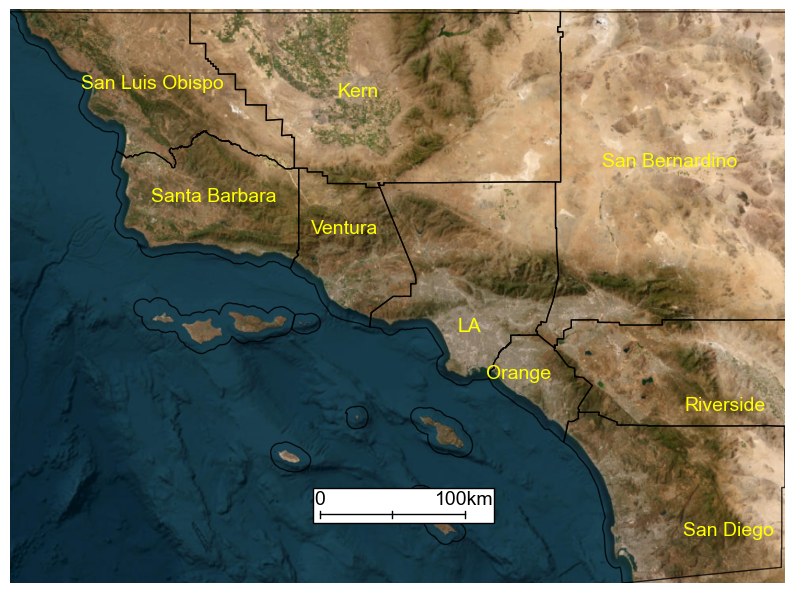

In [158]:
def plot_counties_layer(ax, sca, offsets, addbar=False,addtext=False,addbasemap=False):
    try:
        # 直接使用bounds计算
        bounds = sca.total_bounds
        print(bounds)
        s73=sca.query('COUNTYFP=="073"')
        _,_,bounds73,_ = s73.total_bounds
        
        # 检查bounds是否有效
        if np.any(~np.isfinite(bounds)):
            print('invald!')
            # 如果有无效值，手动计算有效范围
            valid_geometries = sca[sca.geometry.notna()]
            bounds = valid_geometries.total_bounds
        
        # 进一步验证bounds
        if len(bounds) != 4 or np.any(~np.isfinite(bounds)):
            raise ValueError("Invalid bounds calculated")
        
        # 稍微扩大范围以确保所有county都能显示
        x_min, y_min, x_max, y_max = bounds
        x_margin = (x_max - x_min) * 0.01
        y_margin = (y_max - y_min) * 0.01
        
        # 设置地图范围
        ax.set_extent([
            x_min, 
            # x_max + x_margin-2, 
            bounds73,
            y_min, 
            y_max
        ], crs=ccrs.PlateCarree())
    
    except Exception as e:
        print(f"Error calculating bounds: {e}")
        # 如果计算bounds失败，使用加利福尼亚州的大致坐标
        # ax.set_extent([-122, -116, 32, 42], crs=ccrs.PlateCarree())

    basemap=[cx.providers.OpenStreetMap.Mapnik,cx.providers.OpenStreetMap.BlackAndWhite,cx.providers.Esri.WorldImagery,cx.providers.Esri.WorldTerrain]
    if addbasemap:
        cx.add_basemap(ax, 
                    source=basemap[2], 
                    crs=ccrs.PlateCarree(),
                        alpha=1,
                        attribution=False
                    )
    # 绘制counties图层
    sca.plot(ax=ax, 
             facecolor='none', 
             edgecolor='black', 
             linewidth=1, 
             alpha=0.8)
    if addbar:
       add_simple_scalebar(ax, length_km=1)  
    # add_appropriate_scalebar(ax, sca)
    if addtext:
        for idx, row in sca.iterrows():
            try:
                county_name = row['NAME']
                # 使用geometry的质心
                centroid = row.geometry.centroid
                x, y = centroid.x, centroid.y
                
                x_offset, y_offset = offsets.get(county_name, (0, 0))
                
                # 设置字体大小
                county_name = 'LA' if county_name in ['Los Angeles'] else county_name
                #Santa Barbara','Ventura','San Luis Obispo','San Diego','LA'
                fontsize = 14 if county_name in ['Orange'] else 14
                
                # 添加文本标签
                ax.text(x + x_offset, y + y_offset,
                        county_name,
                        ha='center',
                        va='center',
                        style='italic',
                        c='yellow',
                    
                        fontsize=fontsize,
                        transform=ccrs.PlateCarree())
            except Exception as e:
                print(f"Error adding label for {county_name}: {e}")

    # if gridline:
    #     gl = ax.gridlines(draw_labels=True,
    #                       linewidth=0.5,
    #                       color='gray',
    #                       alpha=0.5,
    #                       linestyle='--')
    #     gl.xlabel_style = {'size': 8, 'color': 'black'}
    #     gl.ylabel_style = {'size': 8, 'color': 'black'}
    #     gl.xformatter = LONGITUDE_FORMATTER
    #     gl.yformatter = LATITUDE_FORMATTER
    plt.axis('off')
offsets = {
    'Los Angeles': (0, -0.2),
    'Riverside': (-0.5, -0.2),
    'San Bernardino': (-0.7, 0.1),
    'Kern': (-0.3, 0),
   'Orange':(-0.15,0.05),
    'Ventura':(-0,0.2),
   'Santa Barbara':(0,0.2),
   'San Diego':(0.3,-0.2)

    
}
fig, axes = plt.subplots(1, 1, figsize=(10, 8), subplot_kw={'projection': ccrs.PlateCarree()})
plot_counties_layer(axes, sca, offsets,1,1,1)
# plt.show()


### plot tree ratio

count   726.000000
mean      3.676309
std       8.750404
min       0.000000
25%       0.000000
50%       0.000000
75%       3.000000
max      83.000000
Name: scatteredhousecountbytract, dtype: float64
0
10
20
50
[-121.43818886   32.52883674 -114.13122247   35.80924121]


/tmp/ipykernel_1361/84166479.py:69: UserWarning: Mismatched number of handles and labels: len(handles) = 5 len(labels) = 4
  legend=ax.legend(handles=combined_handles,


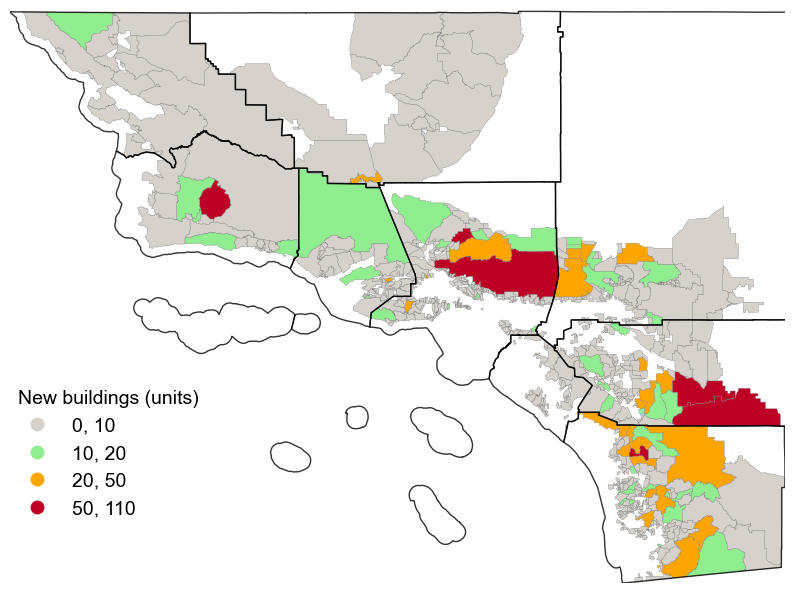

In [172]:

def plot_tree_ratios(dataframe, sca, offsets, column, ax, bins,title,tag,barscale,addtext):
   # dataframe=dataframe[dataframe[column]>0]
   print(dataframe[column].describe())
   # colors_list = ['grey', '#addd8e', '#41ab5d', '#238b45', 'darkgreen']  # 从灰色到深绿色
   #浅色系['#f0f9e8','#bae4bc']
   # colors_list = ['grey', '#b2d65c','#addd8e', '#41ab5d', '#006d2c', 'darkgreen']  
   # colors_list = ['#d6d1ca', '#abd6a9', 'lightgreen', '#3cd60b','darkgreen']
   # colors_list = ['#d6d1ca', '#abd6a9', 'lightgreen', '#3cd60b','darkgreen']
   colors_list=['#d6d1caCC','#c2e699CC','#90EE90CC','#31a354CC','#006837CC'] #]
   colors_list=['#d6d1ca','#c2e699','#90EE90','#31a354','#006837'] #]
   # ## ratio of tree cover 2010
   # colors_list=['#d6d1ca','#c2e699','#90EE90','#31a354']
   
   #%% color for differce of tree cover change
   # colors_list=['orange','#d6d1ca','#c2e699','#90EE90','#006837']

   # colors_list=['#d6d1ca','#c2e699','#90EE90','#31a354'] #]
 
   # custom_cmap = colors.ListedColormap(colors_list)
   #83c5be 蓝色
   #### for housing density unit/km2 census tract
   # colors_list=['#d6d1ca','#ffdfd1','orange','#ff0000']
   # ### for housing density unit census tract
   # colors_list=['#d6d1ca','#c2e699','orange',"#fd8d3c80","#ff000080"]
   # colors_list=["#f1eef6","#d7b5d8","#df65b0","#dd1c77","#980043"]
   colors_list=["#d6d1ca","lightgreen","#fecc5c","orange","#bd0026"] #橘色系,green#d5edc3 last one
   # colors_list=["#d6d1ca","#ecda9a","#f3ad6a","#f97b57"] # new builldings
   # colors_list=["#d6d1ca","yellow","#f3ad6a","#f97b57","#ee4d5a"
   # ecda9a,#efc47e,#f3ad6a,#f7945d,#f97b57,#f66356,#ee4d5a
   custom_cmap = colors.ListedColormap(colors_list)
   dataframe.plot(column=column,
                  edgecolor='grey',
                   linewidth=0.25,
                   ax=ax,
                   legend=True,
                   cmap=custom_cmap,
                   scheme='user_defined',
                   classification_kwds={'bins': bins},
                   legend_kwds={'title':f'{title}', 
                     'fontsize':12,
                     # 'title_fontproperties':{'weight':'bold'},
                     'title_fontsize':13,
                     'alignment':'left',
                     'loc': 'lower left',
                     'frameon':False,
                     })
   # nf71.plot(ax=ax,color='#0000FF00', edgecolor='#0000FF')
   # nf37.plot(ax=ax,color='#0000FF00', edgecolor='#00FFFF')
   # nf111.plot(ax=ax,color='#0000FF00', edgecolor='#FF00FF')
   # 创建行政边界图例句柄
   boundary_handle = Line2D([0], [0], color='grey', linewidth=1)
   # 获取原有图例
   original_legend = ax.get_legend()
   for text in original_legend.get_texts():
      # print(text)
      value_as_integer1,value_as_integer2 = int(float(text.get_text().replace(" ", "").split(',')[0])),int(float(text.get_text().replace(" ", "").split(',')[1]))
      print(value_as_integer1)
      if value_as_integer1==53:
         value_as_integer1=50
      text.set_text(f'{value_as_integer1}, {value_as_integer2}')
   # 合并图例
   combined_handles = original_legend.legend_handles + [boundary_handle]
   if tag:
      combined_labels = [text.get_text() for text in original_legend.get_texts()] + ['Census tract boundary']
   else:
      combined_labels = [text.get_text() for text in original_legend.get_texts()]
   # 重新创建图例
   legend=ax.legend(handles=combined_handles, 
            labels=combined_labels, 
            alignment='left',
            fontsize=14,
            loc=(0,0.1), 
            frameon=False, 
            title=f'{title}', 
            title_fontsize=14,
           )
   
   # legend.get_texts()[-1].set_fontsize(14)
   plot_counties_layer(ax, sca, offsets,barscale,addtext)
   # ax.add_artist(scalebar)

fig, axes = plt.subplots(1, 1, figsize=(10, 8), subplot_kw={'projection': ccrs.PlateCarree()})
# Define bins
bins = [0,0.05,0.1,0.2] # for mean tree cover ratio change 2010-2022,colors_list=['#d6d1ca','#c2e699','#90EE90','#31a354','#006837']
# bins=[100,250,500,1000,2000] # for old building,colors_list=["#d6d1ca","#ecda9a","#f3ad6a","#f97b57","#ee4d5a"]
# bins=[1,50,100,370] # for old building,colors_list=["#d6d1ca","#ecda9a","#f3ad6a","#f97b57","#ee4d5a"]
# bins=[0.5,0.6,0.7,0.8,1]
# bins=[50,100,500]
# bins = [-0.1,0,0.1,0.2]
bins = [0.05,0.15,0.3,0.5] 
# bins = [0.1,0.3,0.5,1] 

# bins = [0.1,0.3,0.5,1] 
bins=[100,500,1000,1500] # for DENSE old buildings
bins=[100,500,1000,2000] # for old buildings
# bins=[10,50,100,370] # for old buildings
bins=[10,50,100,500]
# bins=[100,250,500]
bins=[10,20,50,110]
offsets = {
    'Los Angeles': (0, -0.2),
    'Riverside': (-0.5, -0.2),
    'San Bernardino': (-0.7, 0.1),
    'Kern': (-0.3, 0),
   'Orange':(-0.15,0.05),
    'Ventura':(-0,0.2),
   'Santa Barbara':(0,0.2),
   'San Diego':(0.3,-0.2)    
}

'oldhousecountbytract', 'newhousecountbytract','newwitholdcountbytract',
'oldhousecountbytract', 'newhousecountbytract','newwitholdcountbytract',
# sat1022highagg1=sat1022highagg.query('oldwithnewcountbytract>0')
# sat1022highagg1['newoldratio']=sat1022highagg1['newwitholdcountbytract']/sat1022highagg1['oldwithnewcountbytract']
# isolatedhousecountbytract,scatteredhousecountbytract verydensehousecountbytract
plot_tree_ratios(sat1022highagg,sca, offsets,'scatteredhousecountbytract',ax=axes, bins=bins,
                 title='New buildings (units)',tag=0,barscale=0,addtext=0) #Buildings Ratio of Tree Cover Increase\n(2010-2022) #Difference in Tree Cover Ratio Increase
# plot_tree_ratios(sat1022highagg,sca, offsets,'oldhcount', axes, bins,
#                  title='Number of new buildings',tag=0) 
'''
Isolated old buildings (units)
New-to-Old Building Proximity Ratio
Old buildings near new buildings (units)
Old buildings near new buildings
Dense clustered buildings
Scattered old buildings (units)
Very dense clustered old buildings (units)
Scattered buildings
Change in Tree Cover Ratio (2010-2022)
Change in Tree Cover Ratio\n\nWUI Fire Area scale
Change in Tree Cover Ratio\n\nIndividual Buildings scale
Housing Units per km² in WUI Fire Area
Ratio of Tree Cover (2010)
treeriseratiobytract Buildings ratio with increased tree cover (2010-2022)
Ratio of Buildings \nwith Increased Tree Cover(2010-2022)
Difference in Tree Cover Change\n(WUI Fire Area Level minus Building level)
'''
plt.show()

In [171]:
sat1022highagg['scatteredhousecountbytract'].sum()

2669.0

In [ ]:
sat1022highagg['newoldratiotract']=sat1022highagg['newhousecountbytract']/sat1022highagg['oldwithnewcountbytract']

In [23]:
sat1022highagg.to_file('../data/Building/cluster/housingtype/vis/housecounteachtract.gpkg')

### plot heatmap

In [10]:
def extractnewhouse(df):
    print(sbufferjoinhousefhsz.crs)
    df['centroid']=df['geometry'].centroid
    housepoint=gpd.GeoDataFrame(df,geometry='centroid',crs='epsg:4326').drop(columns=['geometry'])
    housepoint.set_geometry('centroid')
    # newhouse=housepoint.query('newhouse==1')
    
    # treerise=housepoint.query('newhouse==0 and treeratiochange>0.1 and housingdensityclass155082=="isloated"')
    # treedown=housepoint.query('newhouse==0 and treeratiochange<-0.1 and housingdensityclass155082=="isloated"')
    
    # treerise.to_file('../statistic/vegechange/vege_housetype/treeriseisolated10.gpkg')
    # treedown.to_file('../statistic/vegechange/vege_housetype/treedownisolated10.gpkg')
    return housepoint
housepoint=extractnewhouse(sbufferjoinhousefhsz)
housepoint['lon']=housepoint['centroid'].x
housepoint['lat']=housepoint['centroid'].y
    

EPSG:4326


/tmp/ipykernel_1361/3550009.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df['centroid']=df['geometry'].centroid


[-121.43818886   32.52883674 -114.13122247   35.80924121]


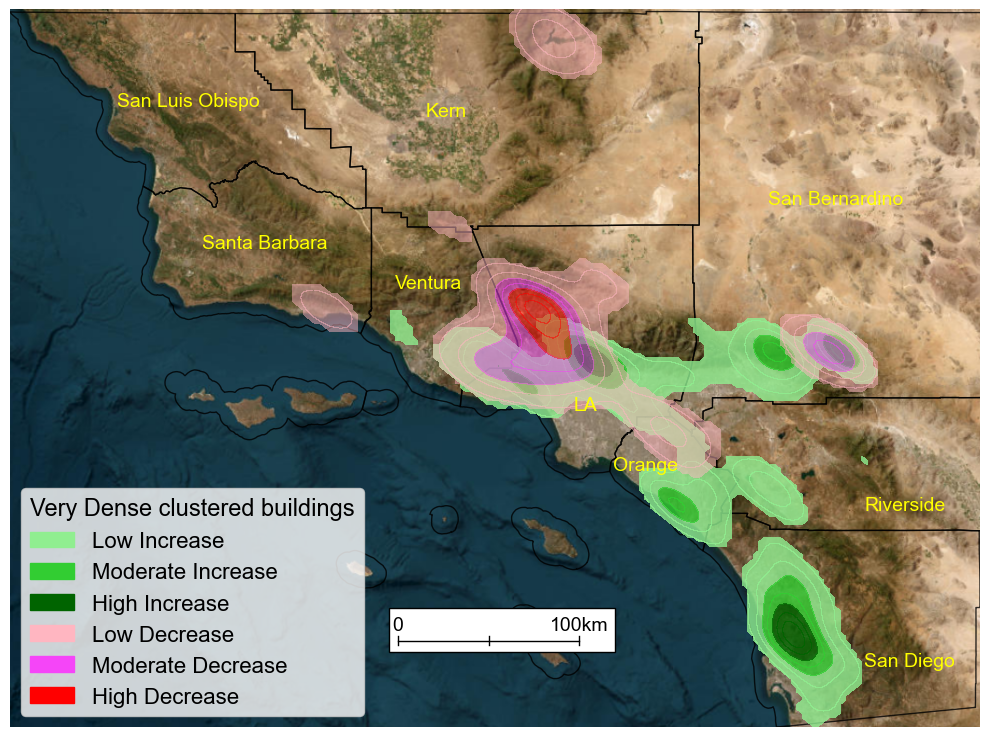

In [160]:
def mapweight(df, ax,title):
    # 分别处理正值和负值
    df_positive = df[df['treeratiochange'] > 0]
    df_negative = df[df['treeratiochange'] < 0]
    
    xmin, ymin, xmax, ymax = df.total_bounds
    x_margin = (xmax - xmin) * 0.1
    y_margin = (ymax - ymin) * 0.1
    xi, yi = np.mgrid[
        xmin - x_margin : xmax + x_margin : 200j, 
        ymin - y_margin : ymax + y_margin : 200j
    ]

    if not df_positive.empty:
        x_pos, y_pos = df_positive.lon, df_positive.lat
        weights_pos = df_positive['treeratiochange']
        weights_pos = (weights_pos - weights_pos.min()) / (weights_pos.max() - weights_pos.min())
        kde_pos = gaussian_kde(np.vstack([x_pos, y_pos]), weights=weights_pos)
        zi_pos = kde_pos(np.vstack([xi.flatten(), yi.flatten()])).reshape(xi.shape)
        # 正值掩码
        mask_pos = zi_pos > 0.2
        zi_pos_masked = zi_pos.copy()
        zi_pos_masked[~mask_pos] = 0
        zi_pos_masked = np.ma.masked_where(zi_pos_masked==0, zi_pos_masked)
    
    # 处理负值核密度
    if not df_negative.empty:
        x_neg, y_neg = df_negative.lon, df_negative.lat
        weights_neg = df_negative['treeratiochange'].abs()
        weights_neg = (weights_neg - weights_neg.min()) / (weights_neg.max() - weights_neg.min())
        kde_neg = gaussian_kde(np.vstack([x_neg, y_neg]), weights=weights_neg)
        zi_neg = kde_neg(np.vstack([xi.flatten(), yi.flatten()])).reshape(xi.shape)
        
        # 负值掩码
        mask_neg = zi_neg > 0.2
        zi_neg_masked = zi_neg.copy()
        zi_neg_masked[~mask_neg] = 0
        zi_neg_masked = np.ma.masked_where(zi_neg_masked==0, zi_neg_masked)

    # 绘制底图
    plot_counties_layer(ax, sca, offsets, 1, 1, 1)

    # 创建两个不同的颜色映射
    colors_pos = ['#90EE90', '#32CD32', '#006400']  # 浅绿到深绿
    colors_neg = ['#FFB6C1', '#f545f8','#FF0000']  # 浅红到深红

    cmap_neg = ListedColormap(colors_neg)
    cmap_pos = ListedColormap(colors_pos)


    if not df_positive.empty:
        contour_pos = ax.contourf(xi, yi, zi_pos_masked, cmap=cmap_pos, alpha=0.8)
    if not df_negative.empty:
        contour_neg = ax.contourf(xi, yi, zi_neg_masked, cmap=cmap_neg, alpha=0.5)
    # 创建图例
    legend_elements = [
        Patch(facecolor=colors_pos[0], edgecolor=colors_pos[0], label='Low Increase'),
        Patch(facecolor=colors_pos[1], edgecolor=colors_pos[1], label='Moderate Increase'),
        Patch(facecolor=colors_pos[2], edgecolor=colors_pos[2], label='High Increase'),
        Patch(facecolor=colors_neg[0], edgecolor=colors_neg[0], label='Low Decrease'),
        Patch(facecolor=colors_neg[1], edgecolor=colors_neg[1], label='Moderate Decrease'),
        Patch(facecolor=colors_neg[2], edgecolor=colors_neg[2], label='High Decrease')
    ]

    ax.legend(handles=legend_elements,
             title=f'{title} buildings', 
             title_fontsize='17',
             loc='lower left',
             alignment='left',
             frameon=True,
             fontsize=16)

    # 绘制其他图层
    # nf71.plot(ax=ax, color='#0000FF00', edgecolor='#0000FF')
    # nf37.plot(ax=ax, color='#0000FF00', edgecolor='#00FFFF')
    # nf111.plot(ax=ax, color='#0000FF00', edgecolor='#FF00FF')
    
    plt.tight_layout()
    return plt

fig, axes = plt.subplots(1, 1, figsize=(10, 8), subplot_kw={'projection': ccrs.PlateCarree()})

bins = [0.1, 0.2, 0.3, 0.5]
offsets = {
    'Los Angeles': (0, -0.2),
    'Riverside': (-0.5, -0.2),
    'San Bernardino': (-0.7, 0.1),
    'Kern': (-0.3, 0),
   'Orange':(-0.15,0.05),
    'Ventura':(-0,0.2),
   'Santa Barbara':(0,0.2),
   'San Diego':(0.3,-0.2)    
}

mapweight(housepoint.query('newhouse==0 and housingdensityclass155082=="very dense"'),axes,title='Very Dense clustered')
plt.show()
# mapweight(housepoint.query('newhouse==0 and housingdensityclass155082=="isloated"'),axes,title='Scattered')
# plt.show()

In [58]:
len(housepoint.query('newhouse==0 and housingdensityclass155082=="lsated"'))

0

Total density: 0.9999999850584679
[-121.43818886   32.52883674 -114.13122247   35.80924121]
0.15000575513716155 2.3618565280508337


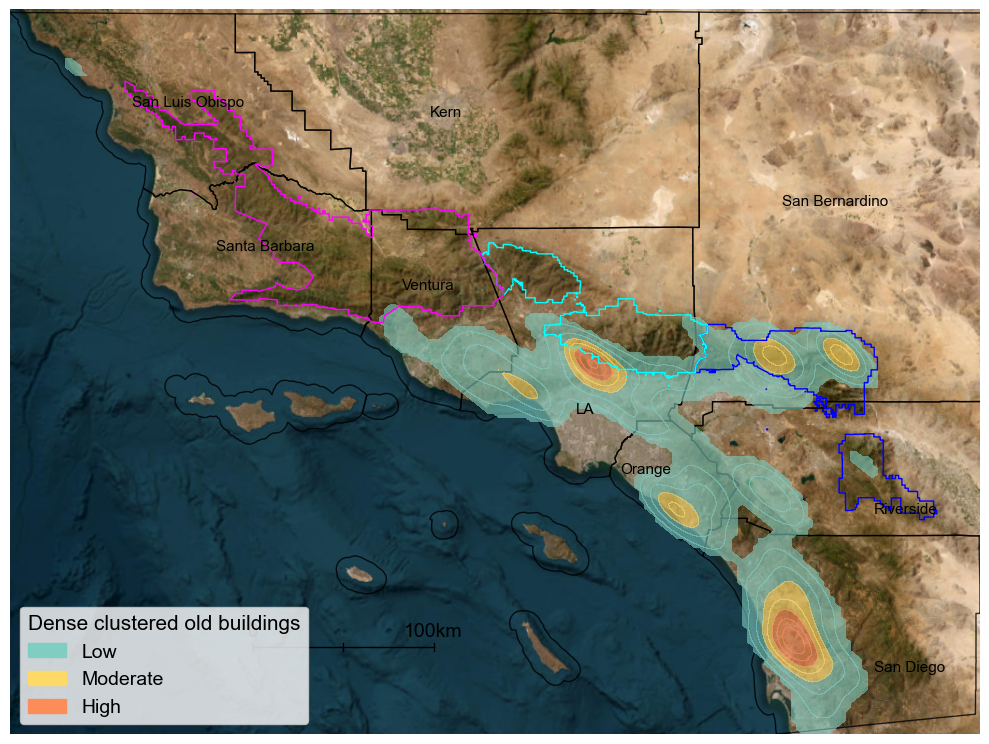

In [ ]:


def mapweight(df,ax,gridline=False):
    # 筛选 treeratiochange > 0 的数据
    df_positive = df[df['treeratiochange'] >0]
    x=df_positive.lon
    y=df_positive.lat
    
    weights=df_positive['treeratiochange'] #.abs()  # 使用绝对值作为权重
    weights = (weights - weights.min()) / (weights.max() - weights.min())  # 归一化
    # 创建核密度估计
    kde = gaussian_kde(
        np.vstack([x, y]), 
        weights=weights)

    ## 创建网格
    xmin, ymin, xmax, ymax = df.total_bounds
    x_margin = (xmax - xmin) * 0.1
    y_margin = (ymax - ymin) * 0.1

    xi, yi = np.mgrid[
        xmin - x_margin : xmax + x_margin : 200j, 
        ymin - y_margin : ymax + y_margin : 200j
    ]
    ## 计算密度
    zi = kde(np.vstack([xi.flatten(), yi.flatten()])).reshape(xi.shape)
    # 验证密度总和,应接近1
    total_density = np.sum(zi) * (xi[1,0] - xi[0,0]) * (yi[0,1] - yi[0,0])
    print(f"Total density: {total_density}")  
    
    plot_counties_layer(ax, sca, offsets,True,True,1)


    mask = zi > 0.15
    zi_masked = zi.copy()
    zi_masked[~mask] = 0
    zi_masked = np.ma.masked_where(zi_masked==0, zi_masked)
    # contour = ax.contourf(xi, yi, zi_masked,cmap='YlOrRd', levels=10, alpha=1)
 

    # 创建自定义颜色映射
    colors = ['#80cdc1','#ffd966', '#fc8d59']  # 蓝色, 黄色, 红色
    cmap = ListedColormap(colors)
    print(zi_masked.min(),zi_masked.max())
    # cmap='coolwarm'
    #如果使用自定义色板，不要加levels
    contour = ax.contourf(xi, yi,zi_masked ,cmap=cmap,  alpha=0.6)

    legend_elements = [
    Patch(facecolor='#80cdc1', edgecolor='#80cdc1', label='Low'),
    Patch(facecolor='#ffd966', edgecolor='#ffd966', label='Moderate'),
    Patch(facecolor='#fc8d59', edgecolor='#fc8d59', label='High')]

    # 创建嵌入的坐标轴来放置颜色条
    # cax = ax.inset_axes([0.05, 0.1, 0.2, 0.02])  # [left, bottom, width, height] 
    ax.legend(handles=legend_elements,
            title='Dense clustered old buildings', 
            title_fontsize='15',
            loc='lower left',
            alignment='left',
            # bbox_to_anchor=(0.2,0.25),
            frameon=True,
            fontsize=14)
    nf71.plot(ax=ax,color='#0000FF00', edgecolor='#0000FF')
    nf37.plot(ax=ax,color='#0000FF00', edgecolor='#00FFFF')
    nf111.plot(ax=ax,color='#0000FF00', edgecolor='#FF00FF')
    plt.tight_layout()
    return plt

fig, axes = plt.subplots(1, 1, figsize=(10, 8), subplot_kw={'projection': ccrs.PlateCarree()})

bins = [0.1, 0.2, 0.3, 0.5]
offsets = {
    'Los Angeles': (0, -0.2),
    'Riverside': (-0.5, -0.2),
    'San Bernardino': (-0.7, 0.1),
    'Kern': (-0.3, 0),
   'Orange':(-0.15,0.05),
    'Ventura':(-0,0.2),
   'Santa Barbara':(0,0.2),
   'San Diego':(0.3,-0.2)    
}

mapweight(housepoint.query('newhouse==0 and housingdensityclass155082=="very dense"'),axes)
plt.show()

In [29]:
len(housepoint)

744381


### plot housing type

In [ ]:


def plot_tract_housedensityratio(gdf,ax,offsets):

    color_map = {
    'verydense': '#d7191c',  # single density in rural area
    'dense': '#e3e928',          # high density in urban area

    'scattered': '#25c94b',        # low density in urban area
    'isolated': '#9999fb', # single density in urban area
} 

    # 添加颜色列用于绘图

    plot_counties_layer(ax, sca, offsets)
    gdf.query('verydensehousecountbyallcountiesratio>0.01').plot(ax=ax, color='red', legend=True,edgecolor='grey',
                   linewidth=0.25)
                
    # gdf.query('verydensehousecountbyallcountiesratio>0.002').plot(ax=ax, color='red', legend=True,edgecolor='grey',
    #                linewidth=0.25)
    # gdf.query('scatteredhousecountbyallcountiesratio>0.01').plot(ax=ax, color='red', legend=True,edgecolor='grey',
    #                linewidth=0.25)
    # gdf.query('isolatedhousecountbytractratio>0.04').plot(ax=ax, color='red', legend=True,edgecolor='grey',
    #                linewidth=0.25)
    plt.legend()

#     # 添加图例
#     legend_labels = [ 'Very dense clustered buildings','Dense clustered buildings', 'Scattered buildings','lsolated buildings'
#                     ]
#     # legend_colors = ['red', 'orange', 'lightgreen','yellow','#ffece5','#aeafad']
#     alpha_value = 1 
#     legend_colors = [
  
    
#     to_rgba('#d7191c', alpha=alpha_value),
#     to_rgba('#e3e928', alpha=alpha_value),
#     to_rgba('#25c94b', alpha=alpha_value),
#     to_rgba('#9999fb', alpha=alpha_value),

# ]
#     handles = [mpatches.Patch(color=color, label=label) for color, label in zip(legend_colors, legend_labels)]
#     plt.legend(handles=handles,loc='lower left',frameon=False,fontsize=16,alignment='left') #title='Dominated housing type by census tract'
#     # plt.axis('off') #不显示fig的边框
#     plt.rcParams["axes.edgecolor"] = "black"
#     plt.rcParams["axes.linewidth"] = 1

    return ax
        
fig, axes = plt.subplots(1, 1, figsize=(10, 8), subplot_kw={'projection': ccrs.PlateCarree()})
# Define bins
bins = [0.1, 0.2, 0.3, 0.5]
# Define offsets for labels
offsets = {
    'Los Angeles': (0, -0.15),
    'Kern': (-0.3, -0),
}
plot_tract_housedensityratio(sat1022highagg.dropna(),axes,offsets)
plt.tight_layout()
plt.show()

In [ ]:


def plot_tract_housedensity(gdf,ax,offsets):

    color_map = {
    'verydense': '#d7191c',  # single density in rural area
    'dense': '#e3e928',          # high density in urban area

    'scattered': 'lightgreen',        # #25c94b
    'isolated': '#9999fb', # single density in urban area
} 

    # 添加颜色列用于绘图
    gdf['plot_color'] = gdf['houseclassbytract'].map(color_map)
    
    gdf.plot(ax=ax, color=gdf['plot_color'], legend=True,edgecolor='grey',
                   linewidth=0.25)

    # 添加图例
    legend_labels = [ 'Very dense clustered old buildings','Dense clustered old buildings', 'Scattered old buildings','lsolated old buildings'
                    ]
    # legend_colors = ['red', 'orange', 'lightgreen','yellow','#ffece5','#aeafad']
    alpha_value = 1 
    legend_colors = [
  
    
    to_rgba('#d7191c', alpha=alpha_value),
    to_rgba('#e3e928', alpha=alpha_value),
    to_rgba('lightgreen', alpha=alpha_value),
    to_rgba('#9999fb', alpha=alpha_value),

]
    handles = [mpatches.Patch(color=color, label=label) for color, label in zip(legend_colors, legend_labels)]
    plt.legend(handles=handles,frameon=False,fontsize=16,alignment='left',
            loc=(0,0.1) ) #title='Dominated housing type by census tract'
    # plt.axis('off') #不显示fig的边框
    plt.rcParams["axes.edgecolor"] = "black"
    plt.rcParams["axes.linewidth"] = 1
    plot_counties_layer(ax, sca, offsets,1)

    return ax
        
fig, axes = plt.subplots(1, 1, figsize=(10, 8), subplot_kw={'projection': ccrs.PlateCarree()})
# Define bins
bins = [0.1, 0.2, 0.3, 0.5]
# Define offsets for labels
offsets = {
    'Los Angeles': (0, -0.2),
    'Riverside': (-0.5, -0.2),
    'San Bernardino': (-0.7, 0.1),
    'Kern': (-0.3, 0),
   'Orange':(-0.15,0.05),
    'Ventura':(-0,0.2),
   'Santa Barbara':(0,0.2),
   'San Diego':(0.3,-0.2)

}
plot_tract_housedensity(sat1022highagg.dropna(),axes,offsets)
plt.tight_layout()
plt.show()



In [ ]:
print(len(housepoint.query('treeratiochange>0'))) #housingdensityclass155082=="scattered"

In [ ]:
treerisefhsz=housepoint.query('treeratiochange>0')
treedownfhsz=housepoint.query('treeratiochange<0')
treedownfhsz.crs,treedownfhsz.columns

In [ ]:
len(housepoint.query('newhouse==0 and newhcount>0'))

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(10, 8), subplot_kw={'projection': ccrs.PlateCarree()})
plot_counties_layer(axes, sca, offsets)
# housepoint.query('housingdensityclass155082=="very dense"').to_crs('epsg:4326')\
# .plot(marker='o', color='#ffa50080', markersize=0.5,ax=axes,label='oldhousewithnew') 

housepoint.query('newhouse==1').to_crs('epsg:4326')\
.plot(marker='x', color='#ff5a00', markersize=0.1,ax=axes)


# housepoint.query('housingdensityclass155082=="scattered"').to_crs('epsg:4326')\
# .plot(marker='o', color='green', markersize=0.5,ax=axes,label='oldhousewithnew')

# housepoint.query('housingdensityclass155082=="isloated"').to_crs('epsg:4326')\
# .plot(marker='x', color='darkgreen', markersize=0.5,ax=axes,label='oldhousewithnew')

# plt.title('Plot of Points from sat1022oldhousehighgdf')
# Add custom legend entry for the counties
custom_legend_elements = [
                          Line2D([0], [0], marker='o', color='w', label='New buildings', 
                                 markerfacecolor='#ff5a00', markersize=10)]

axes.legend(handles=custom_legend_elements,loc=(0,0.15),frameon=False,fontsize=14)


plt.show()

In [ ]:
sat1022highagg['houseclassbytract'].value_counts()

### plot trainandtest

In [178]:
samples=gpd.read_file('../statistic/studyarea/traintestsamples.shp').drop_duplicates(subset=['TRACTCE','year'])
samples['TRACTCE']=samples['COUNTYFP']+samples['TRACTCE']

samplestractjoin=gpd.sjoin(tract2022gdf,samples,how='right')
samplestractjoin=samplestractjoin[samplestractjoin['class'].notna()]
samplestractjoin['categorybyyear']=samplestractjoin['category']+samplestractjoin['year'].astype(str)


samplestractjoin=samplestractjoin.replace('train2022','train2010')

samplestractjoin['categorybyyear'].value_counts()
samplestraintest=samplestractjoin.groupby(['Tract','categorybyyear']).sample(1,replace=True)

In [197]:

def plot_counties_layerfortrain(ax, sca, offsets,addbar,addtext):
    try:
        # 直接使用bounds计算
        bounds = sca.total_bounds
        # 检查bounds是否有效
        if np.any(~np.isfinite(bounds)):
            print('invald!')
            # 如果有无效值，手动计算有效范围
            valid_geometries = sca[sca.geometry.notna()]
            bounds = valid_geometries.total_bounds
        
        # 进一步验证bounds
        if len(bounds) != 4 or np.any(~np.isfinite(bounds)):
            raise ValueError("Invalid bounds calculated")
        
        # 稍微扩大范围以确保所有county都能显示
        x_min, y_min, x_max, y_max = bounds
        x_margin = (x_max - x_min) * 0.01
        y_margin = (y_max - y_min) * 0.01
        
        # 设置地图范围
        ax.set_extent([
            x_min, 
            # x_max + x_margin-2, 
            x_max,
            y_min, 
            y_max
        ], crs=ccrs.PlateCarree())
    
    except Exception as e:
        print(f"Error calculating bounds: {e}")

    sca.plot(ax=ax, 
             facecolor='none', 
             edgecolor='black',
             linewidth=1,
             alpha=0.5)
    if addbar:
       add_simple_scalebar(ax, length_km=1)  
    # add_appropriate_scalebar(ax, sca)
    if addtext:
        for idx, row in sca.iterrows():
            try:
                county_name = row['NAME']
                # 使用geometry的质心
                centroid = row.geometry.centroid
                x, y = centroid.x, centroid.y
                
                x_offset, y_offset = offsets.get(county_name, (0, 0))
                
                # 设置字体大小
                # county_name = 'LA' if county_name in ['Los Angeles'] else county_name
                #Santa Barbara','Ventura','San Luis Obispo','San Diego','LA'
                fontsize = 11 if county_name in ['Orange'] else 11
                
                # 添加文本标签
                ax.text(x + x_offset, y + y_offset,
                        county_name,
                        ha='center',
                        va='center',
                        style='italic',
                    
                        fontsize=fontsize,
                        transform=ccrs.PlateCarree())
            except Exception as e:
                print(f"Error adding label for {county_name}: {e}")
    


In [ ]:
from matplotlib.colors import to_rgba
def plot_triantest(gdf,ax,offsets):

    plot_counties_layerfortrain(ax, sca, offsets,1,1)
    gdf.query('categorybyyear=="train2010"').plot(ax=ax, color='red',marker='+', markersize=13,edgecolor='black',linewidth=0.5,legend=True)
    gdf.query('categorybyyear=="test2010"').plot(ax=ax, color='orange',marker='x', markersize=15,edgecolor='black',linewidth=1,legend=True)
    gdf.query('categorybyyear=="test2022"').plot(ax=ax, color='blue',marker='o', markersize=10,edgecolor='black',linewidth=0.5,legend=True)

    custom_legend_elements = [
                        Line2D([0], [1], marker='+', color='w', label='Training2010', markersize=5,markeredgecolor='red'),
                        Line2D([0], [1], marker='x', color='w', label='Testing2010', markersize=5,markeredgecolor='orange'),

                        Line2D([0], [1], marker='o', color='w', label='Testing2022',markersize=5, markeredgecolor='blue',markerfacecolor='blue'),
                          
                          
                          ]

    # axes.legend or plt.legend both is ok,but must using handles, otherwise no legend show?
    ax.legend(handles=custom_legend_elements,frameon=False,alignment='left',loc=(0,0.1),fontsize=14)

    # ax.legend(loc='lower left',frameon=False,fontsize=11,alignment='left') 
    plt.axis('off') #不显示fig的边框
    plt.rcParams["axes.edgecolor"] = "black"
    plt.rcParams["axes.linewidth"] = 1
    return ax
        

fig, axes = plt.subplots(1, 1, figsize=(10, 8), subplot_kw={'projection': ccrs.PlateCarree()})
offsets = {
    'Los Angeles': (0, -0.2),
    'Riverside': (-0.5, -0.2),
    'San Bernardino': (-0.7, 0.1),
    'Kern': (-0.3, -0.1),
   'Orange':(-0.15,0.05),
    'Ventura':(-0,0.2),
   'Santa Barbara':(0,0.2),
   'San Diego':(0.3,-0.1)

}

plot_triantest(samplestraintest,axes,offsets)
# plt.tight_layout()
plt.show()

### plot legend

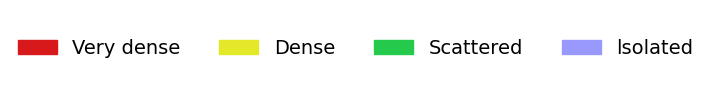

In [1]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# 创建一个示例图形
fig, ax = plt.subplots(figsize=(3, 1))


legend_elements = [
    Patch(facecolor='#d7191c', edgecolor='#d7191c', label='Very dense'),
    Patch(facecolor='#e3e928', edgecolor='#e3e928', label='Dense'),
    Patch(facecolor='#25c94b', edgecolor='#25c94b', label='Scattered'),
    # Patch(facecolor='#FFFFFF', edgecolor='#D3D3D3', label='Barren land'),
    Patch(facecolor='#9999fb', edgecolor='#9999fb', label='lsolated')]

# 添加图例
ax.legend(handles=legend_elements, loc='center', ncol=4,  frameon=False,fontsize=14)

# 隐藏坐标轴
ax.axis('off')

# 显示图形
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# 创建一个示例图形
fig, ax = plt.subplots(figsize=(3, 1))

# 创建颜色块
legend_elements = [
    Patch(facecolor='#006400', edgecolor='#006400', label='Tree'),
    Patch(facecolor='#7CFC00', edgecolor='#7CFC00', label='Grass'),
    Patch(facecolor='#8B0000', edgecolor='#8B0000', label='Impervious surface'),
    # Patch(facecolor='#FFFFFF', edgecolor='#D3D3D3', label='Barren land'),
    Patch(facecolor='#FFFFFF', edgecolor='#FFFFFF', label='Barren land')
]

# 添加图例
ax.legend(handles=legend_elements, loc='center', ncol=4,  frameon=False,fontsize=14)

# 隐藏坐标轴
ax.axis('off')

# 显示图形
plt.show()

## plot 混淆矩阵

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# confusion_matrix = np.array([
#     [1414,80,4,2],
#     [95,1234,2,21],
#     [2,0,991,77],
#     [1,12,63,578],
# ])
# confusion_matrix = np.array([
#     [1126,116,3,2],
#     [74,780,1,7],
#     [0,0,582,41],
#     [1,3,103,405],
# ])
# def plot_confusion_matrix(cm, classes):
#     plt.figure(figsize=(10, 8))


#     sns.heatmap(cm, 
#                 annot=True, 
#                 fmt='d',
#                 cmap=plt.cm.Oranges,
#                 square=True,
#                 xticklabels=classes,
#                 yticklabels=classes,
#                 cbar=False,
#                 annot_kws={'size': 14}
                
#                 )

#     plt.ylabel('True label',fontsize=12)
#     plt.xlabel('Predicted label',fontsize=12)
#     plt.xticks(fontsize=12)
#     plt.yticks(fontsize=12)

#     # plt.tight_layout()
#     plt.show()

# # 使用示例：
# # classes = ['类别1', '类别2', '类别3']  # 您的类别名称
# plot_confusion_matrix(confusion_matrix, ['Tree','Grass','Impervious surface','Barren land'])

def plot_two_confusion_matrices(cm1, cm2, classes):
    # 创建1行2列的子图
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
    
    # 第一个混淆矩阵
    sns.heatmap(cm1,
                annot=True,
                fmt='d',
                cmap=plt.cm.Reds,
                square=True,
                xticklabels=classes,
                yticklabels=classes,
                cbar=False,
                annot_kws={'size': 20},
                ax=ax1
                )

    ax1.set_ylabel('True label', fontsize=18)
    ax1.tick_params(labelsize=18)
    
    # 第二个混淆矩阵
    sns.heatmap(cm2,
                annot=True,
                fmt='d',
                cmap=plt.cm.Reds,
                square=True,
                xticklabels=classes,
                yticklabels=classes,
                cbar=False,
                annot_kws={'size': 20},
                ax=ax2
                )

    # 第二个图不需要y轴标签
    ax2.set_ylabel('')
    ax2.tick_params(labelsize=18)
    
    # 在底部添加共用的x轴标签
    fig.text(0.5, -0.05, 'Predicted label', ha='center', fontsize=18)
    
    plt.tight_layout()
    plt.show()

# 使用示例：
classes = ['Tree', 'Grass', 'Impervious surface', 'Barren land']
cm1 = np.array([
    [1414,80,4,2],
    [95,1234,2,21],
    [2,0,991,77],
    [1,12,63,578],
])
cm2 = np.array([
    [1126,116,3,2],
    [74,780,1,7],
    [0,0,582,41],
    [1,3,103,405],
])

plot_two_confusion_matrices(cm1, cm2, classes)
confusion_matrix = np.array([
    [1414,80,4,2],
    [95,1234,2,21],
    [2,0,991,77],
    [1,12,63,578],
])


In [ ]:

def calculate_per_class_metrics(cm, classes):
    n_classes = len(classes)
    precision_dict = {}
    recall_dict = {}
    
    for i in range(n_classes):
        # 计算精确率 (precision)
        # 精确率 = 真正例 / (该列的和)
        precision = cm[i,i] / cm[:,i].sum() if cm[:,i].sum() != 0 else 0
        precision_dict[classes[i]] = round(precision, 4)
        
        # 计算召回率 (recall)
        # 召回率 = 真正例 / (该行的和)
        recall = cm[i,i] / cm[i,:].sum() if cm[i,:].sum() != 0 else 0
        recall_dict[classes[i]] = round(recall, 4)
    
    return precision_dict, recall_dict
# precision_dict, recall_dict = calculate_per_class_metrics(confusion_matrix, ['Tree','Grass','Impervious surface','Barren land'])

# print("每类的精确率：")
# for class_name, precision in precision_dict.items():
#     print(f"{class_name}: {precision:.2%}")

# print("\n每类的召回率：")
# for class_name, recall in recall_dict.items():
#     print(f"{class_name}: {recall:.2%}")